<a href="https://colab.research.google.com/github/Sordhiq/2024-data-short-course/blob/main/Copy_of_eDNA_script2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specifying filepath from the Google drive

file_path = '/content/drive/MyDrive/eDNA/BOLD_Public.19-Apr-2024.tsv'

In [ ]:

# Creating an empty list to hold the fields
data = []

# Expected number of fields
e_n_of_f = 56

with open(file_path, 'r') as f:
    for line in f:
        fields = line.strip().split('\t')
        if len(fields) == e_n_of_f:
            data.append(fields)

# Create dataFrame and set the index
df_0 = pd.DataFrame(data)

#df.reset_index()

# Setting the header
df_0.columns = df_0.iloc[0]

# Dropping duplicate header
df_0=df_0.drop(index=0)

# Inspecting the first 5 few rows
df_0.head()


0    processid      sampleid specimenid museumid       fieldid  \
1  AAASF001-17  CBGSFMX-0101    7804897     None  CBGSFMX-0101   
2  AAASF004-17  CBGSFMX-0301    7804900     None  CBGSFMX-0301   
3  AAASF005-17  CBGSFMX-0302    7804901     None  CBGSFMX-0302   
4  AAASF006-17  CBGSFMX-0303    7804902     None  CBGSFMX-0303   
5  AAASF007-17  CBGSFMX-0304    7804903     None  CBGSFMX-0304   

0                                inst       bin_uri         identification  \
1  Universidad Autonoma de Nuevo Leon  BOLD:ADP3520     Lutzomyia cruciata   
2  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
3  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
4  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
5  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   

0 funding_src   kingdom  ... species_reference identification_method  \
1        None  Animalia  ...              None         Morphological   
2        None  Animalia  ...              None         Morphological   
3        None  Animalia  ...              None         Morphological   
4        None  Animalia  ...              None         Morphological   
5        None  Animalia  ...              None         Morphological   

0                      recordset_code_arr    gb_acs marker_code  \
1  ['AAASF', 'DS-17IBMWP', 'DS-UNIQUE17']  MK851247      COI-5P   
2                 ['AAASF', 'DS-17IBMWP']  MK851267      COI-5P   
3                               ['AAASF']  MK851266      COI-5P   
4                 ['AAASF', 'DS-17IBMWP']  MK851265      COI-5P   
5                 ['AAASF', 'DS-17IBMWP']  MK851254      COI-5P   

0                                             nucraw  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   

0                                  sequence_run_site processid_minted_date  \
1  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
2  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
3  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
4  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
5  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   

0 sequence_upload_date identification_rank  
1          12-Jun-2017             species  
2          14-Jun-2017             species  
3          14-Jun-2017             species  
4          14-Jun-2017             species  
5          14-Jun-2017             species  

[5 rows x 56 columns]

In [ ]:
df_1=df_0.copy(deep=True)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   processid                 108550 non-null  object
 1   sampleid                  108550 non-null  object
 2   specimenid                108550 non-null  object
 3   museumid                  108550 non-null  object
 4   fieldid                   108550 non-null  object
 5   inst                      108550 non-null  object
 6   bin_uri                   108550 non-null  object
 7   identification            108550 non-null  object
 8   funding_src               108550 non-null  object
 9   kingdom                   108550 non-null  object
 10  phylum                    108550 non-null  object
 11  class                     108550 non-null  object
 12  order                     108550 non-null  object
 13  family                    108550 non-null  object
 14  subf

In [ ]:

 # Inspecting the shape of the dataframe
df_1.shape

(108550, 56)

In [ ]:
# Inspecting the datatypes of the various features
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   processid                 108550 non-null  object
 1   sampleid                  108550 non-null  object
 2   specimenid                108550 non-null  object
 3   museumid                  108550 non-null  object
 4   fieldid                   108550 non-null  object
 5   inst                      108550 non-null  object
 6   bin_uri                   108550 non-null  object
 7   identification            108550 non-null  object
 8   funding_src               108550 non-null  object
 9   kingdom                   108550 non-null  object
 10  phylum                    108550 non-null  object
 11  class                     108550 non-null  object
 12  order                     108550 non-null  object
 13  family                    108550 non-null  object
 14  subf

In [ ]:
df_1.columns.unique()

Index(['processid', 'sampleid', 'specimenid', 'museumid', 'fieldid', 'inst',
       'bin_uri', 'identification', 'funding_src', 'kingdom', 'phylum',
       'class', 'order', 'family', 'subfamily', 'genus', 'species',
       'subspecies', 'identified_by', 'voucher_type', 'collectors',
       'collection_date', 'collection_date_accuracy', 'life_stage', 'sex',
       'reproduction', 'extrainfo', 'notes', 'coord', 'coord_source',
       'coord_accuracy', 'elev', 'depth', 'elev_accuracy', 'depth_accuracy',
       'country', 'province', 'country_iso', 'region', 'sector', 'site',
       'collection_time', 'habitat', 'collection_note', 'associated_taxa',
       'associated_specimen', 'species_reference', 'identification_method',
       'recordset_code_arr', 'gb_acs', 'marker_code', 'nucraw',
       'sequence_run_site', 'processid_minted_date', 'sequence_upload_date',
       'identification_rank'],
      dtype='object', name=0)

In [ ]:
len(df_1.columns.unique())

56

In [ ]:
df_1['habitat'].unique()

array(['None', '1.1 Boreal Forest', 'Savannah', 'Plankton',
       'Water column', 'pelagic', 'lowland rainforest', 'Mixed Habitat',
       'Riparian Zone', 'Grassland', 'Wetland', 'Lake', 'Creek',
       '1. Forest & Woodland|1.2 Subarctic Forest',
       '1. Forest & Woodland | 1.1 Boreal Forest', 'Mixed habitat',
       'eukrenon, limnokren', 'River Alcantara',
       'River Agri, brige on road SS598',
       'River Proccella, Campofelice di Roccella',
       'River near road Sortino-Lentini',
       'moss on the rocks, near a river', 'River Velino near Cesoni',
       'Rivier Vera, Tempera', 'rocks in the river current',
       'gravel in the river current', 'Elovica River',
       'source of a river', "Devil's Throat Cave, still water body",
       'an isolated still water body', 'interstitial water',
       'a stream in a forest', 'a stream', 'a still water body',
       'S. Tirino, near Capestrano', 'R. Mentaro, near Martirano',
       'R. Alcantara, Gole Alcantara', 'R. Velino 

In [ ]:

x=df_1.loc[[1],['species']]
print(x)

0             species
1  Lutzomyia cruciata


In [ ]:
y=df_1.loc[[1],['nucraw']]
print(y.to_string())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              nucraw
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTG

In [ ]:
habitat=df_1['habitat'].unique().copy()
df_habitat=pd.DataFrame(habitat)
df_habitat

0
0                                          None
1                             1.1 Boreal Forest
2                                      Savannah
3                                      Plankton
4                                  Water column
..                                          ...
71                        Poa foliosa (tussock)
72                                Chicken plots
73            4. Native Grassland | 4.1. Tundra
74  4. Native Grassland|4.2 Subarctic Grassland
75               1. Forest|1.2 Subarctic Forest

[76 rows x 1 columns]

Columns to remove:
"sampleid","museumid","fieldid","inst","processid_minted_date","identification_method","identified_by","collectors","collection_date","collection_date_accuracy","collection_time","collection_note","coord_source","extrainfo","notes","voucher_type","associated_specimen","associated_taxa","sequence_upload_date","sequence_run_site","recordset_code_arr","funding_src","species_reference","depth_accuracy","elev_accuracy","coord_accuracy","subspecies","country_iso"



In [ ]:
# Looking out for the ID columns
rem_columns = ["sampleid","museumid","fieldid","inst","processid_minted_date","identification_method","identified_by","collectors","collection_date","collection_date_accuracy","collection_time","collection_note","coord_source","extrainfo","notes","voucher_type","associated_specimen","associated_taxa","sequence_upload_date","sequence_run_site","recordset_code_arr","funding_src","species_reference","depth_accuracy","elev_accuracy","coord_accuracy","subspecies","country_iso"]

df_2 = df_1.drop(rem_columns, axis=1)
df_2.shape

(108550, 28)

In [ ]:

df_2.head()

0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ... country  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   

0      province      region sector  site habitat    gb_acs marker_code  \
1  Quintana Roo  Candelaria   None  None    None  MK851247      COI-5P   
2  Quintana Roo      Huayun   None  None    None  MK851267      COI-5P   
3  Quintana Roo      Huayun   None  None    None  MK851266      COI-5P   
4  Quintana Roo      Huayun   None  None    None  MK851265      COI-5P   
5  Quintana Roo      Huayun   None  None    None  MK851254      COI-5P   

0                                             nucraw identification_rank  
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species  
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  

[5 rows x 28 columns]

In [ ]:
# Function to convert columns with 'date' or 'time' in their names to datetime
#def convert_to_datetime(df):
#    for i in df.columns:
#        if 'date' in i.lower() or 'time' in i.lower():
#            df[i] = pd.to_datetime(df[i], errors='coerce')
#    return df

In [ ]:
import re

In [ ]:
#Classify Habitat type

habitat_patterns = {
    r'Forest': 'Forest',
    r'Boreal Forest': 'Forest',
    r'Savannah': 'Grassland',
    r'Grassland': 'Grassland',
    r'Wetland': 'Wetland',
    r'Lake': 'Water Body',
    r'Creek': 'River/Stream',
    r'River': 'River/Stream',
    r'Stream': 'River/Stream',
    r'Plankton': 'Marine',
    r'Water column': 'Marine',
    r'pelagic': 'Marine',
    r'Mixed Habitat': 'Mixed Habitat',
    r'Mixed habitat': 'Mixed Habitat',
    r'Cave': 'Cave',
    r'Shrubland': 'Shrubland',
    r'Tundra': 'Grassland',
    r'None': 'None',
    r'moss': 'Other',
    r'still water body': 'Water Body',
    r'interstitial water': 'Water Body',
    r'surface of a pond': 'Water Body',
    r'lowland rainforest': 'Forest',
    r'moist soil': 'Forest',
    r'Peat': 'Forest',
    r'Leaf Litter': 'Forest',
    r'soil': 'Forest',
    r'Sahalian village': 'Other',
    r'Chicken plots': 'Other',
    r'eukrenon': 'Other'
}

def classify_habitat(habitat):
    for pattern, habitat_type in habitat_patterns.items():
        if re.search(pattern, habitat, re.IGNORECASE):
            return habitat_type
    return 'Unknown'

df_2['habitat_type'] = df_2['habitat'].apply(classify_habitat)
df_2.head()


0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ...  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   

0      province      region sector  site habitat    gb_acs marker_code  \
1  Quintana Roo  Candelaria   None  None    None  MK851247      COI-5P   
2  Quintana Roo      Huayun   None  None    None  MK851267      COI-5P   
3  Quintana Roo      Huayun   None  None    None  MK851266      COI-5P   
4  Quintana Roo      Huayun   None  None    None  MK851265      COI-5P   
5  Quintana Roo      Huayun   None  None    None  MK851254      COI-5P   

0                                             nucraw identification_rank  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   

0 habitat_type  
1         None  
2         None  
3         None  
4         None  
5         None  

[5 rows x 29 columns]

In [ ]:
df_2['habitat_type'].unique()

array(['None', 'Forest', 'Grassland', 'Marine', 'Mixed Habitat',
       'Unknown', 'Wetland', 'Water Body', 'River/Stream', 'Other',
       'Cave', 'Shrubland'], dtype=object)

In [ ]:
# looking out for missing values
#df.isnull().sum()

In [ ]:
#checking none entries
none_counts = df_2.apply(lambda col: col.str.lower().eq('none').sum())
print(none_counts)

0
processid                   0
specimenid                  0
bin_uri                 16626
identification              0
kingdom                     0
phylum                      0
class                     182
order                     901
family                  13097
subfamily               47891
genus                   43637
species                 55719
life_stage              77000
sex                     85764
reproduction            82780
coord                    7164
elev                    57982
depth                  107080
country                   810
province                 6792
region                  46652
sector                  50117
site                    38180
habitat                 70221
gb_acs                  59965
marker_code                 0
nucraw                      0
identification_rank         0
habitat_type            70221
dtype: int64


In [ ]:
108550-59965

48585

In [ ]:
# dropping columns with missing values over 100,000

#missing_values_count = df.isnull().sum()
#columns_to_drop = missing_values_count[missing_values_count > 100000].index
#df = df.drop(columns=columns_to_drop)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   processid            108550 non-null  object
 1   specimenid           108550 non-null  object
 2   bin_uri              108550 non-null  object
 3   identification       108550 non-null  object
 4   kingdom              108550 non-null  object
 5   phylum               108550 non-null  object
 6   class                108550 non-null  object
 7   order                108550 non-null  object
 8   family               108550 non-null  object
 9   subfamily            108550 non-null  object
 10  genus                108550 non-null  object
 11  species              108550 non-null  object
 12  life_stage           108550 non-null  object
 13  sex                  108550 non-null  object
 14  reproduction         108550 non-null  object
 15  coord                108550 non-nu

In [ ]:
df_3=df_2.copy()

In [ ]:
#Transforming coordinates into lattitude
df_3['coord'] = df_3['coord'].str.strip('()')
df_3[['Latitude', 'Longitude']] = None
df_3.loc[df_3['coord'] == 'None', ['Latitude', 'Longitude']] = 'None'
mask = df_3['coord'] != 'None'
df_3.loc[mask, ['Latitude', 'Longitude']] = df_3.loc[mask, 'coord'].str.split(',', expand=True)
df_3.loc[mask,['Latitude']] = df_3.loc[mask,['Latitude']].astype(float)
df_3.loc[mask,['Longitude']] = df_3.loc[mask,['Longitude']].astype(float)
df_3.loc[df_3['coord'] == 'None', ['Latitude', 'Longitude']] = 'None'


df_3.drop(columns=['coord'], inplace=True)
df_3.head()


0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ... sector  site  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   

0 habitat    gb_acs marker_code  \
1    None  MK851247      COI-5P   
2    None  MK851267      COI-5P   
3    None  MK851266      COI-5P   
4    None  MK851265      COI-5P   
5    None  MK851254      COI-5P   

0                                             nucraw identification_rank  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   

0 habitat_type Latitude Longitude  
1         None      NaN       NaN  
2         None      NaN       NaN  
3         None      NaN       NaN  
4         None      NaN       NaN  
5         None      NaN       NaN  

[5 rows x 30 columns]

In [ ]:
# Function to create the mapping dictionary and encode the DataFrame manually
def manual_encode(df):
    encoders = {}
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        unique_values = df[column].unique()
        encoder = {value: idx for idx, value in enumerate(unique_values)}
        encoders[column] = encoder
        df[column] = df[column].map(encoder)
    return df, encoders

# Encode the DataFrame

encoded_df, encoders = manual_encode(df_3)



In [ ]:
#Checking encoder dictionary
first_key = list(encoders.keys())[0]
print(first_key)

processid


In [ ]:
# Assuming 'encoders' is the dictionary from the manual_encode function
# Create a list to hold the rows for the new DataFrame
encoder_list = []

# Loop through the encoders dictionary to create rows
for column, mapping in encoders.items():
    for original_value, encoded_value in mapping.items():
        encoder_list.append({'Column': column, 'Original Value': original_value, 'Encoded Value': encoded_value})

# Create a DataFrame from the list
encoders_df = pd.DataFrame(encoder_list)

# Visualize the DataFrame
print(encoders_df.head())  # Display the first few rows of the DataFrame

# Optionally, save the DataFrame to a CSV file for easier inspection
encoders_df.to_csv('encoders_mapping.csv', index=False)

      Column Original Value  Encoded Value
0  processid    AAASF001-17              0
1  processid    AAASF004-17              1
2  processid    AAASF005-17              2
3  processid    AAASF006-17              3
4  processid    AAASF007-17              4


In [ ]:
encoders_df.isnull().sum()

Column            0
Original Value    2
Encoded Value     0
dtype: int64

In [ ]:
encoders_habitat=encoders_df[encoders_df['Column']=='habitat_type'].copy()
encoders_species=encoders_df[encoders_df['Column']=='species'].copy()
encoders_habitat.head()

Column Original Value  Encoded Value
352523  habitat_type           None              0
352524  habitat_type         Forest              1
352525  habitat_type      Grassland              2
352526  habitat_type         Marine              3
352527  habitat_type  Mixed Habitat              4

In [ ]:
#checking encoder dictionary
first_encoded_value=encoders[first_key]
print(first_encoded_value)

{'AAASF001-17': 0, 'AAASF004-17': 1, 'AAASF005-17': 2, 'AAASF006-17': 3, 'AAASF007-17': 4, 'AAASF008-17': 5, 'AAASF009-17': 6, 'AAASF010-17': 7, 'AAASF011-17': 8, 'AAASF012-17': 9, 'AAASF013-17': 10, 'AAASF014-17': 11, 'AAASF015-17': 12, 'AAASF019-17': 13, 'AAASF020-17': 14, 'AAASF021-17': 15, 'AAASF022-17': 16, 'AAASF023-17': 17, 'AAASF024-17': 18, 'AAASF025-17': 19, 'AAASF026-17': 20, 'AAASF027-17': 21, 'AAASF028-17': 22, 'AAASF029-17': 23, 'AAASF030-17': 24, 'AAASF032-17': 25, 'AAASF034-18': 26, 'AAASF035-18': 27, 'AAASF036-18': 28, 'AAASF040-18': 29, 'AAASF041-18': 30, 'AAASF042-18': 31, 'AAASF043-18': 32, 'AAASF044-18': 33, 'AAASF045-18': 34, 'AAASF046-18': 35, 'AAASF047-18': 36, 'AAASF048-18': 37, 'AAASF049-18': 38, 'AAASF050-18': 39, 'AAASF051-18': 40, 'AAASF052-18': 41, 'AAASF053-18': 42, 'AAASF054-18': 43, 'AACTA001-20': 44, 'AACTA002-20': 45, 'AACTA003-20': 46, 'AACTA008-20': 47, 'AACTA009-20': 48, 'AACTA010-20': 49, 'AACTA011-20': 50, 'AACTA012-20': 51, 'AACTA013-20': 52, 'A

In [ ]:
encoded_df.head()

0  processid  specimenid  bin_uri  identification  kingdom  phylum  class  \
1          0           0        0               0        0       0      0   
2          1           1        1               1        0       0      0   
3          2           2        1               1        0       0      0   
4          3           3        1               1        0       0      0   
5          4           4        1               1        0       0      0   

0  order  family  subfamily  ...  sector  site  habitat  gb_acs  marker_code  \
1      0       0          0  ...       0     0        0       0            0   
2      0       0          0  ...       0     0        0       1            0   
3      0       0          0  ...       0     0        0       2            0   
4      0       0          0  ...       0     0        0       3            0   
5      0       0          0  ...       0     0        0       4            0   

0  nucraw  identification_rank  habitat_type  Latitude  Longitude  
1       0                    0             0         0          0  
2       1                    0             0         0          0  
3       2                    0             0         0          0  
4       3                    0             0         0          0  
5       4                    0             0         0          0  

[5 rows x 30 columns]

<Axes: xlabel='0', ylabel='0'>

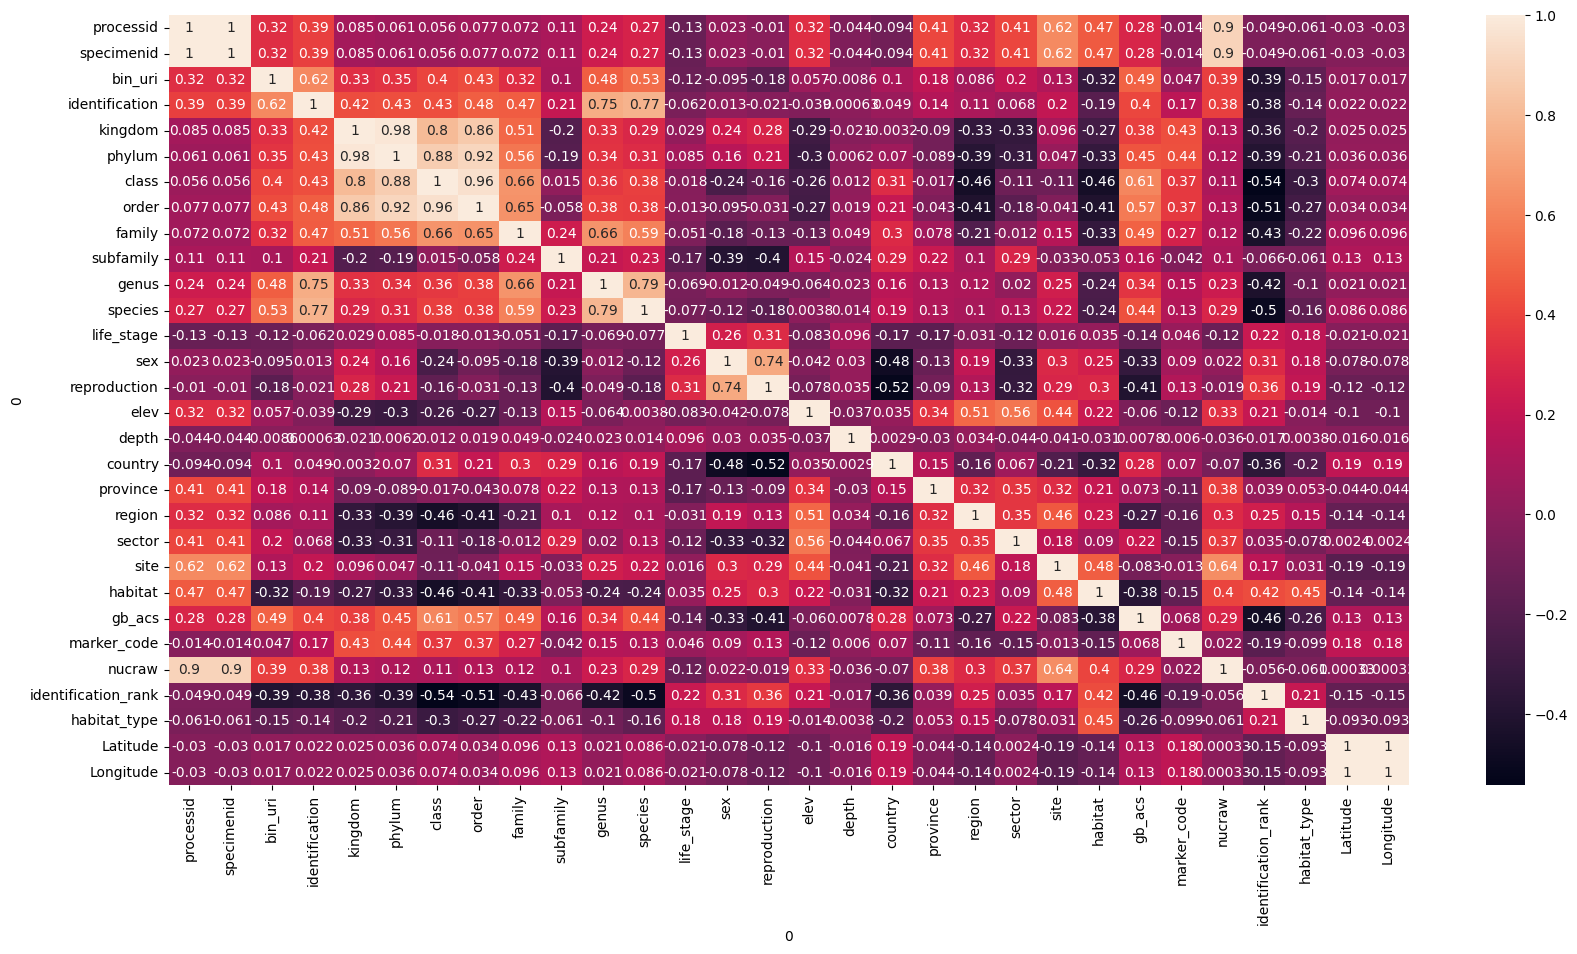

In [ ]:
#Correlation of encoded_df
fig = plt.figure(figsize=(20, 10))

sns.heatmap(encoded_df.corr(), annot=True, cbar='coolwarm')

In [ ]:
#Selecting few of the columns that are of interest

encoded_dfselected=encoded_df[["processid",'specimenid','bin_uri','identification','kingdom','phylum','species','Latitude','Longitude','elev','depth','habitat','marker_code','nucraw','identification_rank']].copy()


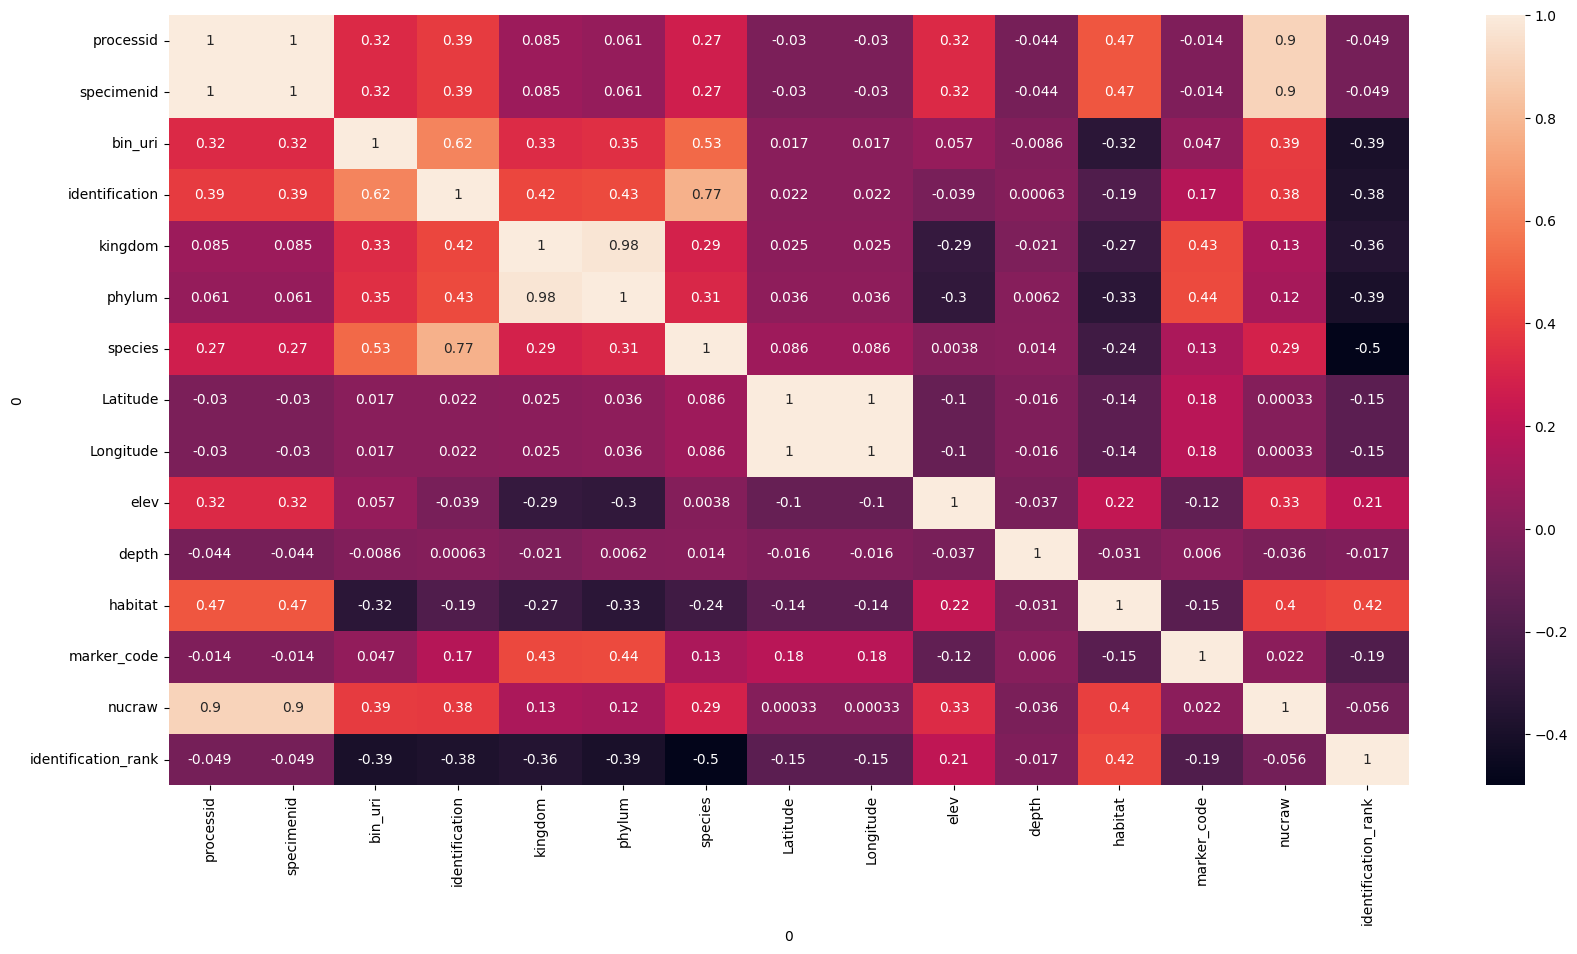

In [ ]:
#Checking correlation with selected df
fig = plt.figure(figsize=(20, 10))

sns.heatmap(encoded_dfselected.corr(), annot=True, cbar='coolwarm');

In [ ]:
#Feature set of encoded_df
encoded_df_x=encoded_df.drop(columns=['habitat'])

In [ ]:
#df_c=df3_encoded[['bin_uri','nucraw']]

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#NORMALIZING THE DATA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_df_x)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

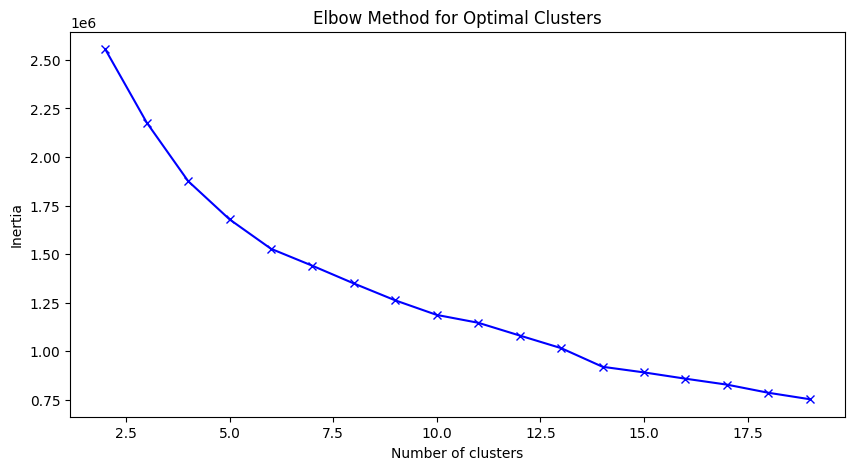

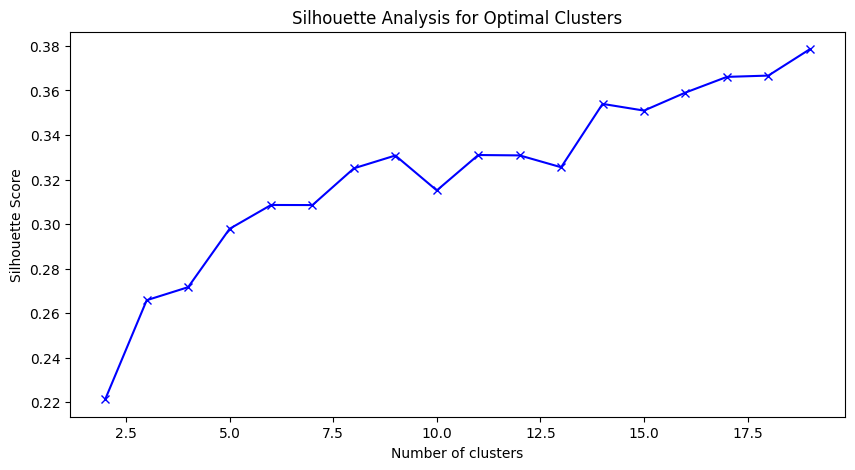

The optimal number of clusters based on silhouette scores is: 19


In [ ]:
# Range of clusters to test
cluster_range = range(2, 20)  # Typically, 2 to 10 clusters are tested

from sklearn.metrics import silhouette_score
# Lists to store the results
inertia = []
silhouette_scores = []



# Run KMeans for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Plot the Silhouette Analysis results
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

# Find the optimal number of clusters based on silhouette scores
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on silhouette scores is: {optimal_clusters}")

In [ ]:
kmeans19 = KMeans(n_clusters=19, random_state=42)
kmeans19.fit(encoded_df_x)
encoded_df_x['Cluster_19'] = kmeans19.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import joblib
# Save the model as a pickle in a file
joblib.dump(kmeans19, 'kmeans19model.pkl')

['kmeans19model.pkl']

In [ ]:
kmeans12 = KMeans(n_clusters=12, random_state=42)
kmeans12.fit(encoded_df_x)
encoded_df_x['Cluster_12'] = kmeans12.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


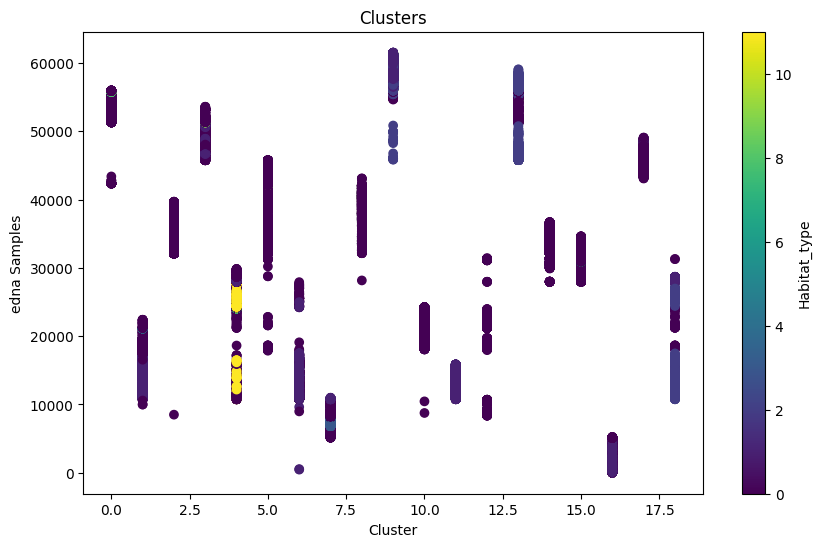

In [ ]:
#With cluster 19
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['Cluster_19'], encoded_df_x['nucraw'], c=encoded_df_x['habitat_type'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('edna Samples')
plt.colorbar(label='Habitat_type')
plt.show()

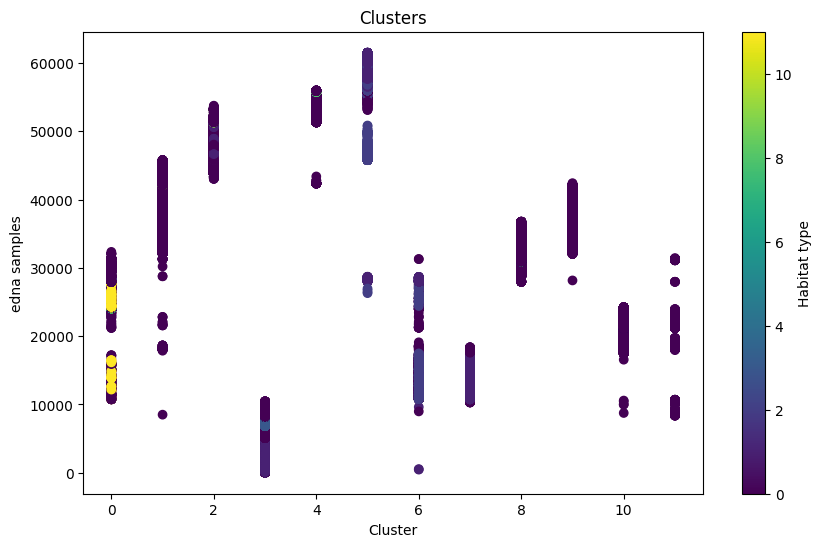

In [ ]:
#With cluster 12
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['Cluster_12'], encoded_df_x['nucraw'], c=encoded_df_x['habitat_type'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('edna samples')
plt.colorbar(label='Habitat type')
plt.show()

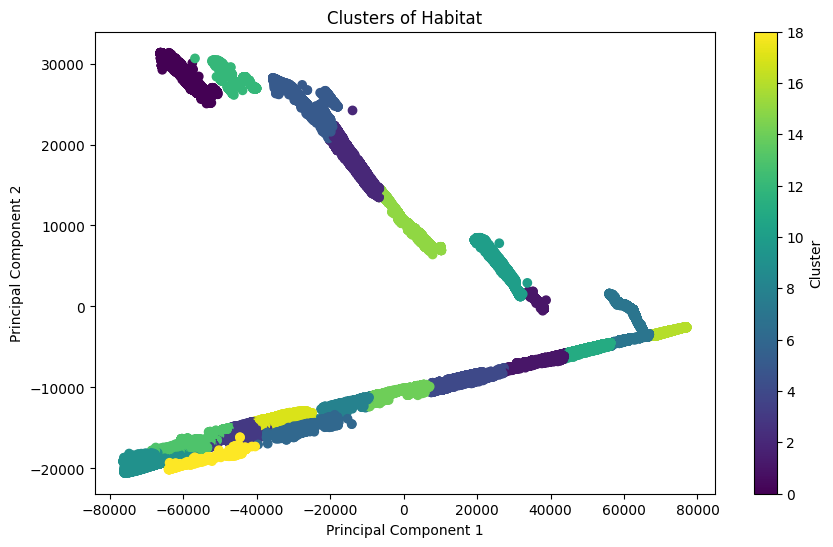

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_df_x)
encoded_df_x['PC1'] = principal_components[:, 0]
encoded_df_x['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['PC1'], encoded_df_x['PC2'], c=encoded_df_x['Cluster_19'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

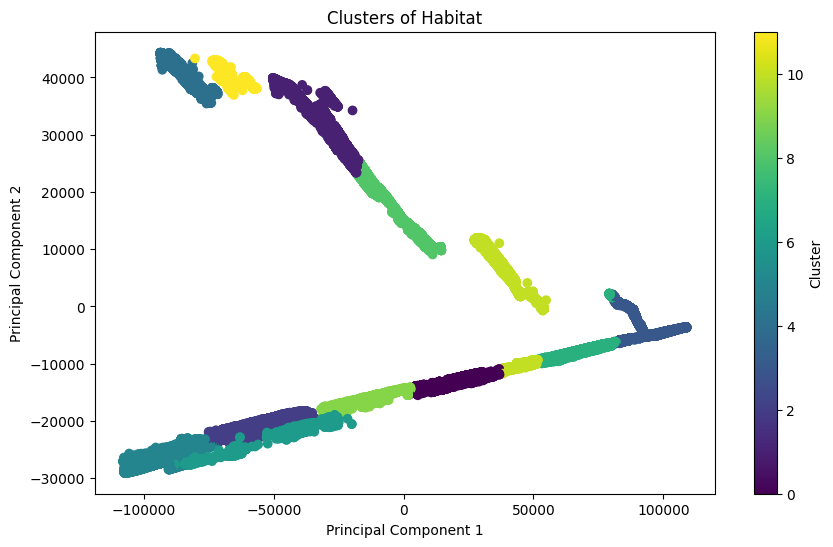

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_df_x)
encoded_df_x['PC1'] = principal_components[:, 0]
encoded_df_x['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['PC1'], encoded_df_x['PC2'], c=encoded_df_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

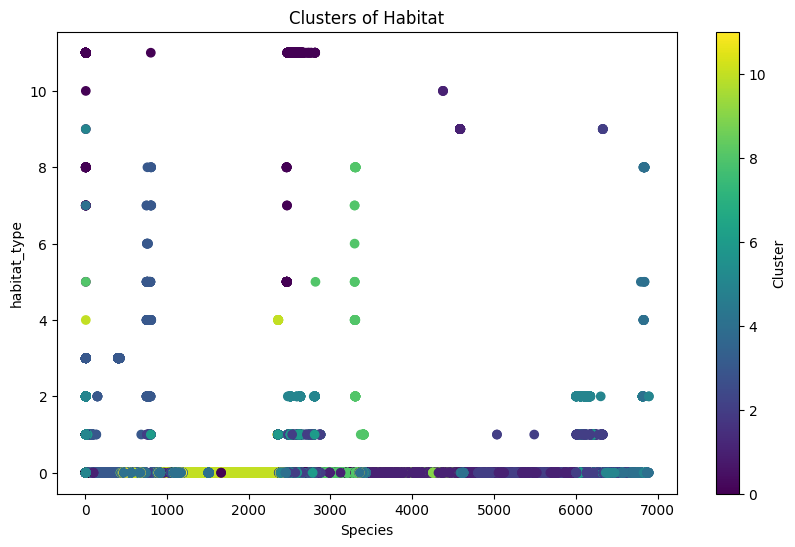

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['species'], encoded_df_x['habitat_type'], c=encoded_df_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Species')
plt.ylabel('habitat_type')
plt.colorbar(label='Cluster')
plt.show()

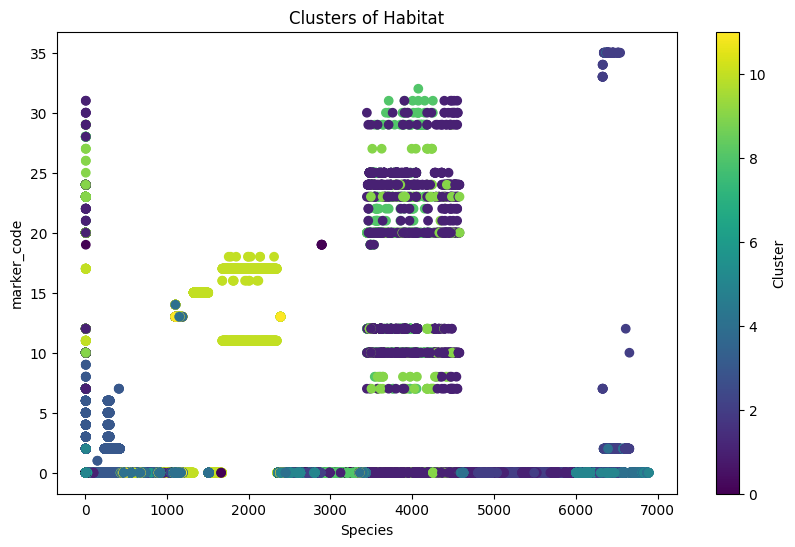

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['species'], encoded_df_x['marker_code'], c=encoded_df_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Species')
plt.ylabel('marker_code')
plt.colorbar(label='Cluster')
plt.show()

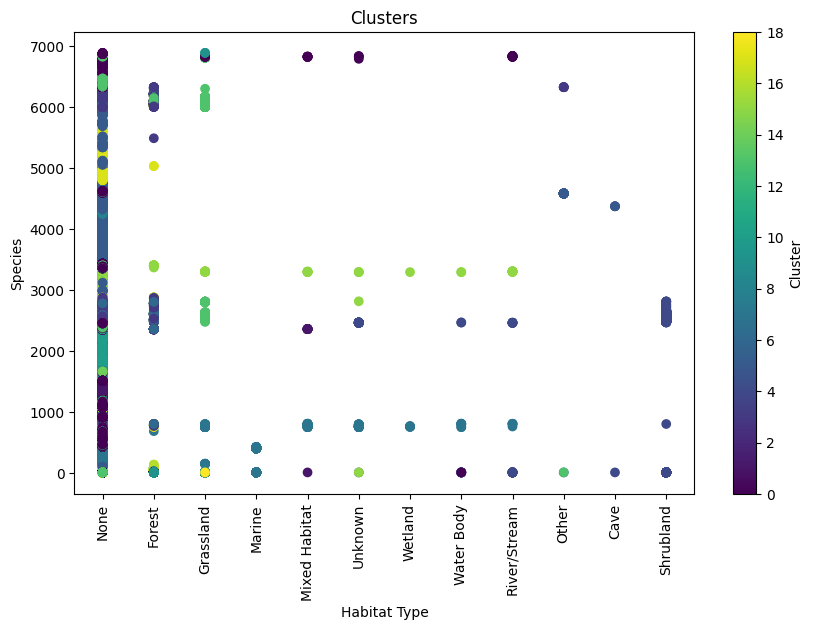

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['habitat_type'], encoded_df_x['species'], c=encoded_df_x['Cluster_19'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Habitat Type')
plt.ylabel('Species')
plt.colorbar(label='Cluster')
plt.xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=90)
#plt.yticks(encoders_species['Encoded Value'],encoders_species['Original Value'])
plt.show()

In [ ]:
len(encoded_df_x['species'].unique())

6895

<ipython-input-53-044fc9d14f8b>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = encoded_df_x_[encoded_df_x['species'] == value]
<ipython-input-53-044fc9d14f8b>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = encoded_df_x_[encoded_df_x['species'] == value]
<ipython-input-53-044fc9d14f8b>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = encoded_df_x_[encoded_df_x['species'] == value]
<ipython-input-53-044fc9d14f8b>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = encoded_df_x_[encoded_df_x['species'] == value]
<ipython-input-53-044fc9d14f8b>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = encoded_df_x_[encoded_df_x['species'] == value]


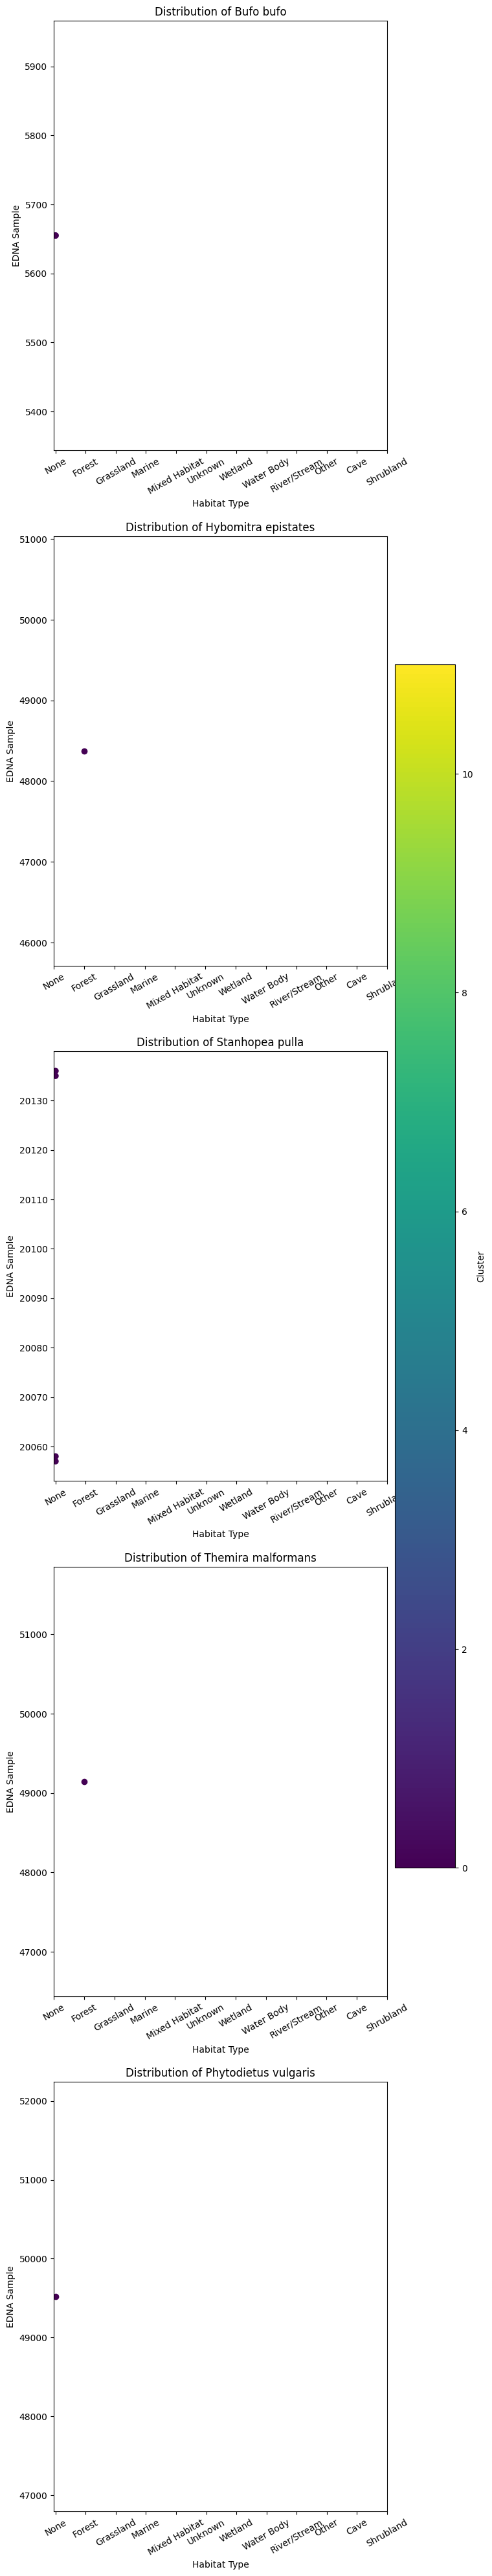

In [ ]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# Get unique values in 'column1'
unique_species = encoded_df_x['species'].unique() #all values were crashing ram

encoded_df_x_ = encoded_df_x[encoded_df_x['species']!=0]
# Create subplots
num_unique_values = 5#len(unique_values) #5
fig, axs = plt.subplots(num_unique_values, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=encoded_df_x_['Cluster_12'].min(), vmax=encoded_df_x_['Cluster_12'].max())

# If only one subplot, axs will not be a list, so we need to handle that case
if num_unique_values == 1:
    axs = [axs]
random_sample= pd.Series(unique_species).sample(5, random_state=1).tolist()
for i, value in enumerate(random_sample):#enumerate(unique_values):#
    subset_df = encoded_df_x_[encoded_df_x['species'] == value]
    axs[i].scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
    sub_t=encoders_species[encoders_species['Encoded Value']==value]['Original Value'].values[0]
    axs[i].set_title(f'Distribution of {sub_t}')
    axs[i].set_xlabel('Habitat Type')
    axs[i].set_xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=30)
    axs[i].set_ylabel('EDNA Sample')



# Add a common colorbar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Cluster')



plt.show()

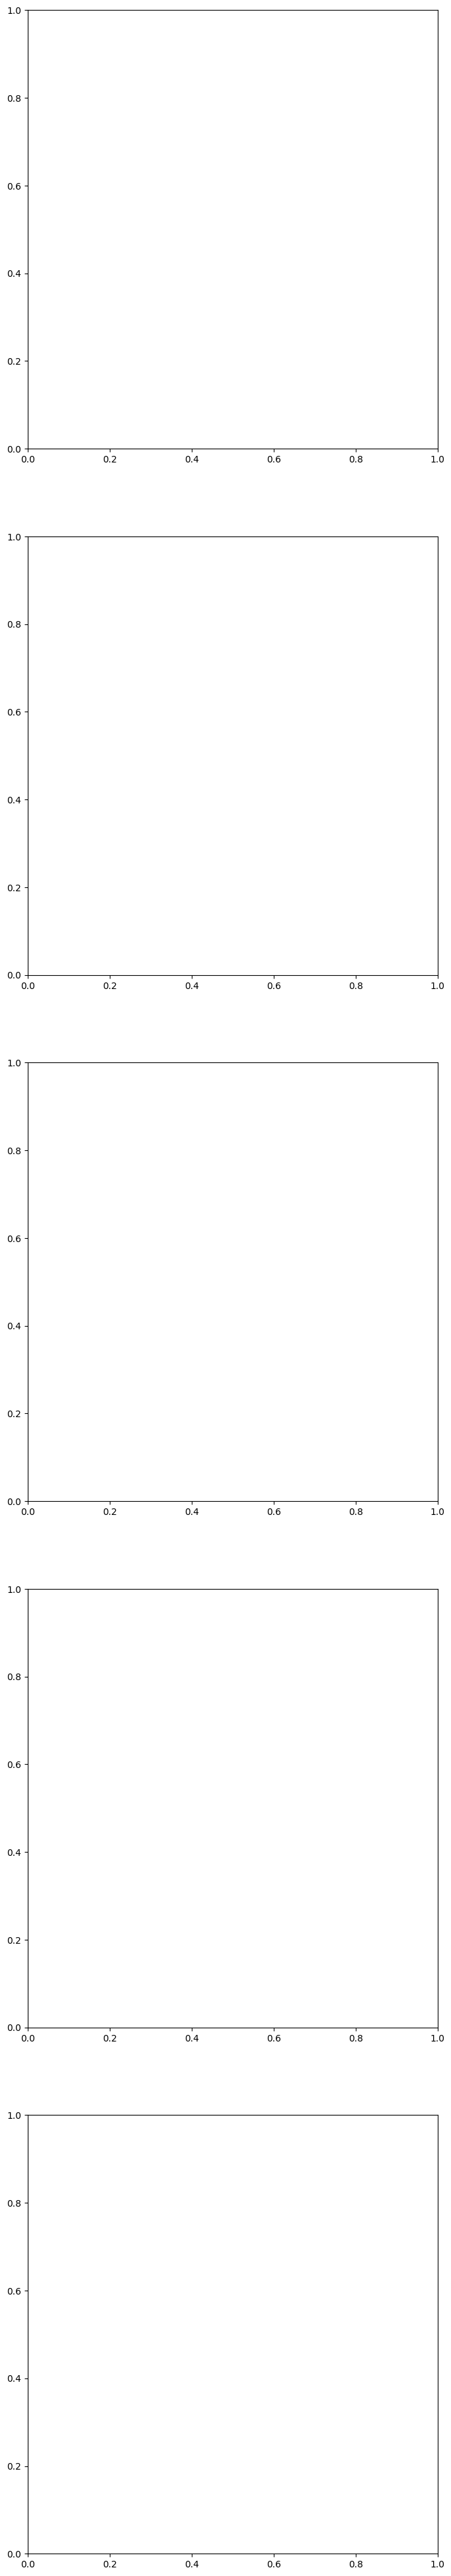

In [ ]:
import matplotlib.animation as animation

# Create a figure and axis for the plot
fig, axs = plt.subplots(num_unique_values, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=encoded_df_x_['Cluster_12'].min(), vmax=encoded_df_x_['Cluster_12'].max())

# Function to update the plot for each frame in the animation
def update(frame):
    axs[0].clear()  # Clear the previous plot
    random_sample = pd.Series(unique_species).sample(5, random_state=frame).tolist()  # Randomly select 5 species
    for i, value in enumerate(random_sample):
        subset_df = encoded_df_x_[encoded_df_x_['species'] == value]
        axs[i].scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
        sub_t = encoders_species[encoders_species['Encoded Value'] == value]['Original Value'].values[0]
        axs[i].set_title(f'Distribution of {sub_t}')
        axs[i].set_xlabel('Habitat Type')
        axs[i].set_xticks(encoders_habitat['Encoded Value'], encoders_habitat['Original Value'], rotation=30)
        axs[i].set_ylabel('EDNA Sample')

    # Add a common colorbar
    cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
    cbar.set_label('Cluster')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=20, repeat=False)

plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


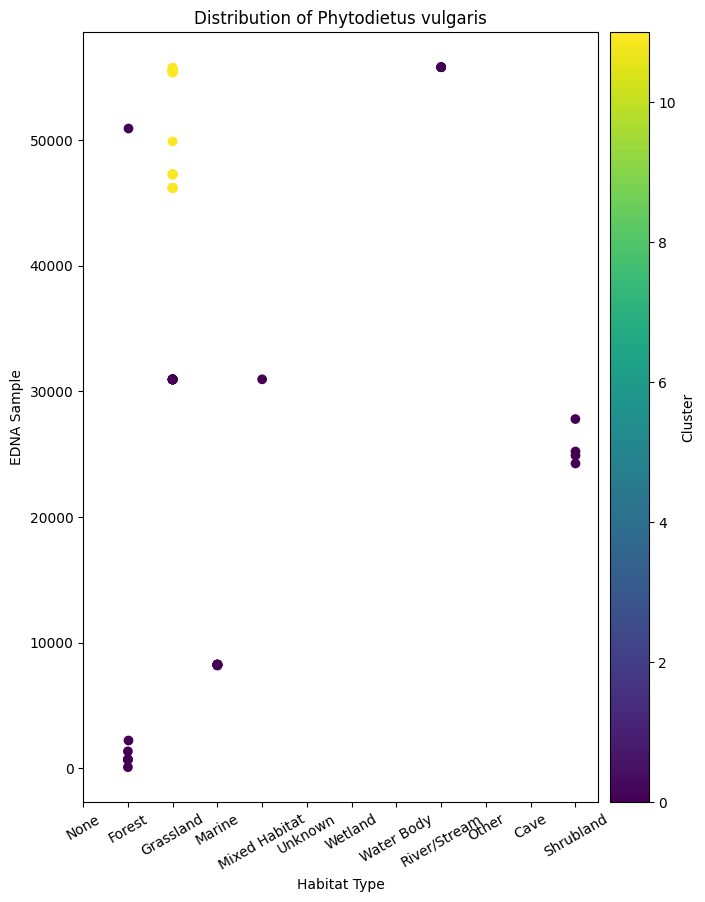

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize figure and axes
fig, axs = plt.subplots(1, 1, figsize=(8,  10))

# Initialize lines for each subplot

#l, = axs.scatter(encoded_df_x_['habitat_type'], encoded_df_x_['nucraw'])  # Initialize with some data


# Define update function
def update(frame):
    # Get unique values in 'column1'
    unique_species = encoded_df_x['species'].unique() #all values were crashing ram
    encoded_df_x_ = encoded_df_x[encoded_df_x['species']!=0]
    encoded_df_x_ = encoded_df_x_[encoded_df_x_['habitat_type']!=0]
# Create subplots
    #num_unique_values = 5#len(unique_values) #5
    #fig, axs = plt.subplots(1, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
    cmap = plt.get_cmap('viridis')
    norm = Normalize(vmin=encoded_df_x_['Cluster_12'].min(), vmax=encoded_df_x_['Cluster_12'].max())

# If only one subplot, axs will not be a list, so we need to handle that case
    random_sample= pd.Series(unique_species).sample(1).tolist()
    subset_df = encoded_df_x_[encoded_df_x_['species'] == random_sample[0]]
    axs.scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
    sub_t=encoders_species[encoders_species['Encoded Value']==value]['Original Value'].values[0]
    axs.set_title(f'Distribution of {sub_t}')
    axs.set_xlabel('Habitat Type')
    axs.set_xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=30)
    axs.set_ylabel('EDNA Sample')



# Add a common colorbar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Cluster')



# Create animation
ani = animation.FuncAnimation(fig, update, frames=50, repeat=False)

# Save animation as MP4
ani.save('animation3.mp4')

plt.show()


-----------------------------------------------------------------
Here we are starting with DNA alignment and Distance matrix generation.

In [ ]:
#installing biopython
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, SeqIO

##Fetching Reference sequence from ncbi sequentially

# email address, which NCBI requires for access
Entrez.email = "medhasharma3250@gmail.com"

def fetch_sequence(accession_number):
    """
    Fetches a nucleotide sequence from GenBank given an accession number.
    """
    try:
        # Fetch the sequence data from NCBI
        handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
        record = SeqIO.read(handle, "genbank")
        handle.close()
        return record
    except Exception as e:
        print(f"Error fetching data for {accession_number}: {e}")
        return None

# Example GenBank accession numbers
accession_numbers = df_2['gb_acs'].unique().tolist()

# Dictionary to store fetched sequences
sequences = {}

for acc in accession_numbers:
    record = fetch_sequence(acc)
    if record:
        sequences[acc] = record

# Display the fetched sequences
for acc, record in sequences.items():
    print(f"Accession: {acc}")
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq}\n")


In [ ]:
len(sequences)

In [ ]:
samp_seq1=df_2.loc[[1],['nucraw']].values
samp_acc=df_2.loc[[1],['gb_acs']].values
ref_seq='AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTGTTTATCCACCTCTTTCAAGAAATATTGCCCATAGAGGAGCTTCTGTTGATTTAGCAATTTTTTCCCTACATTTAGCCGGGATTTCATCTATTCTTGGAGCAGTAAATTTTATTACTACAGTTATTAATATACGATCTGCTGGAATTACATTAGATCGAATACCTTTATTTGTTTGATCTGTAATAATTACTGCGGTACTTCTATTATTATCATTACCTGTTTTAGCAGGTGCAATTACAATACTTCTAACTGATCGTAATCTAAATACTTCTTTTTTTGACCCTGCGGGAGGTGGGGATCCAATTTTATATCAACATTTATTT'
print(samp_acc)


In [ ]:
samp_seq1==ref_seq


In [ ]:
df_1.head()



NameError: name 'df_1' is not defined

In [ ]:
from Bio import Entrez, SeqIO

##Fetching Reference sequence from ncbi using batch

# email address, which NCBI requires for access
Entrez.email = "medhasharma3250@gmail.com"


def fetch_sequences(accession_numbers):
    """
    Fetches nucleotide sequences from GenBank given a list of accession numbers.
    """
    try:
        # Post the list of accession numbers to NCBI
        search_results = Entrez.epost(db="nucleotide", id=",".join(accession_numbers))
        search_results_content = search_results.read().decode("utf-8")
        webenv = search_results_content.split("<WebEnv>")[1].split("</WebEnv>")[0]
        query_key = search_results_content.split("<QueryKey>")[1].split("</QueryKey>")[0]

        # Fetch the sequence data from NCBI
        handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", webenv=webenv, query_key=query_key)
        records = list(SeqIO.parse(handle, "genbank"))
        handle.close()

        return records
    except Exception as e:
        print(f"Error fetching data for accession numbers: {e}")
        return []


# Example GenBank accession numbers
accession_numbers = df_2['gb_acs'].unique().tolist() # Replace with valid accession numbers

# Fetch the sequences in batch
sequences = fetch_sequences(accession_numbers)

# Dictionary to store fetched sequences
sequences_dict = {record.id: record.seq for record in sequences}

# Display the fetched sequences
'''
for acc, record in sequences_dict.items():
    print(f"Accession: {acc}")
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq}\n")
'''


In [ ]:
len(sequences_dict)

In [ ]:
# Function to clean up the sequence strings
def clean_sequence(seq):
    seq=str(seq)
    if seq.startswith('Seq(') and seq.endswith(')'):
        return seq[4:-1]
    return seq
def clean_keys(key):
    return key.split('.')[0]
# Clean up the sequences in the dictionary
cleaned_sequence_dic = {clean_keys(k): clean_sequence(v) for k, v in sequences_dict.items()}

In [ ]:
len(cleaned_sequence_dic)

In [ ]:
cleaned_sequence_dic['MN183996']

In [ ]:
sequences_dict.keys()

In [ ]:
accession_numbers

In [ ]:
samp_seq1df=df_2[df_2['gb_acs']=='MK851247'].copy()
samp_seq1df[['processid','marker_code','species','gb_acs','habitat_type','nucraw']]

In [ ]:
accession_numbers = df_3['gb_acs'].unique().tolist()

In [ ]:
samp_seq2df=df_2[df_2['species']=='Lutzomyia cruciata']
samp_seq2df[['processid','marker_code','species','gb_acs','habitat_type','nucraw']]

In [ ]:
grouped_df=df_2.groupby(['species', 'processid', 'marker_code','gb_acs','nucraw','habitat_type'])
grouped_df.head()

In [ ]:
selgrouped_df=grouped_df[['species', 'processid', 'marker_code','gb_acs','nucraw','habitat_type']].head()

In [ ]:

selgrouped_df['ref_nu']=selgrouped_df['gb_acs'].map(cleaned_sequence_dic)

In [ ]:
selgrouped_df.head()

In [ ]:
!sudo apt-get update
!sudo apt-get install libenchant1c2a libenchant-dev

In [ ]:
!pip install python-Levenshtein


In [ ]:
from Levenshtein import distance

def calculate_distance(row):
    nucraw = str(row['nucraw'])
    reference_seq = str(row['ref_nu'])
    return distance(nucraw, reference_seq)

# Apply the function to each row and store the distances in a new column
selgrouped_df['levenshtein_distance'] = selgrouped_df.apply(calculate_distance, axis=1)


In [ ]:
selgrouped_df.head()

In [ ]:
selgrouped_df.to_csv('final_grouped.csv',sep=',', index=False, encoding='utf-8')

In [ ]:
# Specify the species value you want to plot

# Select five random species
random_species = selgrouped_df['species'].unique()

selected_species = np.random.choice(random_species, size=5, replace=False)

# Create scatter plots for each selected species
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i,species in enumerate(selected_species):
    selected_df = selgrouped_df[selgrouped_df['species'] == species]
    axs[i].scatter(selected_df['habitat_type'], selected_df['levenshtein_distance'], label=species)
    axs[i].set_title(f"{species}")
    axs[i].set_xlabel("Habitat Type")
    axs[i].set_ylabel("Levenshtein Distance")
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
selgrouped_df.info()

In [ ]:
selgrouped_df_obj=selgrouped_df[['species', 'processid', 'marker_code','gb_acs','nucraw','habitat_type']]

In [ ]:
selencodedgrouped=selgrouped_df

In [ ]:
#Encoding
encoded_selgrouped_df, encoders_sel = manual_encode(selgrouped_df)


In [ ]:
selgrouped_df.head()

In [ ]:
encoded_selgrouped_df.head()

In [ ]:
# Assuming 'encoders' is the dictionary from the manual_encode function
# Create a list to hold the rows for the new DataFrame
encodersel_list = []

# Loop through the encoders dictionary to create rows
for column, mapping in encoders_sel.items():
    for original_value, encoded_value in mapping.items():
        encodersel_list.append({'Column': column, 'Original Value': original_value, 'Encoded Value': encoded_value})

# Create a DataFrame from the list
encoders_sel_df = pd.DataFrame(encodersel_list)

# Visualize the DataFrame
print(encoders_sel_df.head())  # Display the first few rows of the DataFrame

# Optionally, save the DataFrame to a CSV file for easier inspection
encoders_df.to_csv('encoders_sel_mapping.csv', index=False)

In [ ]:
df_1['habitat']

In [ ]:
encoded_X=encoded_selgrouped_df[['species',	'processid',	'marker_code',	'gb_acs',	'nucraw'	,	'levenshtein_distance']]
encoded_y=encoded_selgrouped_df[['habitat_type']]

In [ ]:
encoded_selgrouped_df.info()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, encoded_y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

In [ ]:
sff

In [ ]:
import joblib
joblib.dump(model, 'DTHabitatClassifier.pickle')


####XXXXXXXXXXXXXXXXXX###############
#XXXXXXXXXXXXXX##################XXXX

In [ ]:
prediction = model.predict('Cyanocorax yucatanicus', 'ABWYT20396-24', 'FL-COI', 'HM208656',
                           'TTATATTTTATATTTGGAGCTTGAGCAGGTATAGTAGGAACCTCTTTAAGAATCTTAATTCGAGCAGAACTAGGACACCCAGGAGCTCTAATTGGAGATGACCAAATTTATAATATAATTGTAACAGCCCATGCTTTTATTATAATTTTTTTTATAGTTATACCTGTTATAATTGGAGGATTTGGAAATTGACTAGTACCCCTAATACTAGGAGCCCCAGATATAGCCTTTCCTCGAATAAATAATATAAGTTTTTGACTTCTTCCTCCTGCTTTAACCTTATTGCTAATAAGCAGTATAGTAGAAAACGGAGCTGGGACAGGATGAACAGTTTACCCTCCTCTCTCTTCAGTTATTGCTCATAGAGGAGCTTCAGTTGATCTTGCAATTTTTTCATTACATTTAGCTGGTATTTCATCTATTTTAGGAGCAGTAAATTTTATTACAACTATTATTAATATGCGATCTGCAGGAATTTCTTTTGATCGAATACCTTTATTTGTTTGATCTGTATTAATCACAGCAGTATTACTTCTTTTATCTCTTCCTGTTCTTGCAGGAGCTATTACTATATTATTAACAGATCGAAATTTTAATACTTCATTCTTTGATCCTGCTGGAGGTGGAGACCCTATTTTATACCAACACTTATTT', 450 )

prediction

In [ ]:
import pickle

with open("Classifier.pickle", "wb") as f:
  model = pickle.dump(model, f)

In [ ]:
targets_class=encoders_df[encoders_df['Column']=='habitat_type']

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


class_names = {idx: value for value, idx in zip(targets_class['Original Value'],targets_class['Encoded Value'])}
report = classification_report(y_test, y_pred, target_names=[class_names[i] for i in range(len(class_names))])

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9827729157070474
Classification Report:
               precision    recall  f1-score   support

         None       0.99      0.99      0.99     21174
       Forest       0.97      0.98      0.98      8218
    Grassland       0.97      0.95      0.96      1532
       Marine       1.00      1.00      1.00       668
Mixed Habitat       0.96      0.69      0.81        39
      Unknown       0.92      0.87      0.89        39
      Wetland       1.00      0.67      0.80         3
   Water Body       0.62      0.71      0.67         7
 River/Stream       0.75      0.91      0.82        23
        Other       0.91      0.91      0.91        22
         Cave       0.00      0.00      0.00         2
    Shrubland       0.93      0.93      0.93       838

     accuracy                           0.98     32565
    macro avg       0.84      0.80      0.81     32565
 weighted avg       0.98      0.98      0.98     32565



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#User Input Values
species1='Lutzomyia cruciata'
processid1='AAASF001-17'
marker_code1='COI-5P'
gb_acs1='MK851247'
nucraw1='AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTGTTTATCCACCTCTTTCAAGAAATATTGCCCATAGAGGAGCTTCTGTTGATTTAGCAATTTTTTCCCTACATTTAGCCGGGATTTCATCTATTCTTGGAGCAGTAAATTTTATTACTACAGTTATTAATATACGATCTGCTGGAATTACATTAGATCGAATACCTTTATTTGTTTGATCTGTAATAATTACTGCGGTACTTCTATTATTATCATTACCTGTTTTAGCAGGTGCAATTACAATACTTCTAACTGATCGTAATCTAAATACTTCTTTTTTTGACCCTGCGGGAGGTGGGGATCCAATTTTATATCAACATTTATTT'

# User-defined values
user_values = {
    'species': species1,
    'processid': processid1,
    'marker_code': marker_code1,
    'gb_acs': gb_acs1,
    'nucraw': nucraw1
}


#import pandas as pd


# Example GenBank accession numbers
accession_numbers = list(set(list(gb_acs1)))

# Fetch the sequences in batch
sequences_ = fetch_sequences(accession_numbers)

# Dictionary to store fetched sequences
sequences_dict_ = {record.id: record.seq for record in sequences}
#Clean sequences
cleaned_sequence_dic_ = {clean_keys(k): clean_sequence(v) for k, v in sequences_dict_.items()}

#Convert User values to df
user_df=pd.DataFrame([user_values])

#Add Reference DNA sequence column
user_df['ref_nu']=user_df['gb_acs'].map(cleaned_sequence_dic)


#Calculate Levenshtein Distance

user_df['levenshtein_distance'] = user_df.apply(calculate_distance, axis=1)

##Encoding values
# Load the CSV file into a DataFrame
encoding_df3 = pd.read_csv('/content/final_encoders_sel_mapping.csv')

# Create mapping dictionaries for each column
mappings = {}
for column in encoding_df3['Column'].unique():
    column_mappings = encoding_df3[encoding_df3['Column'] == column].set_index('Original Value')['Encoded Value'].to_dict()
    mappings[column] = column_mappings


# Encode the object type columns in user_df
for col in user_df.select_dtypes(include=['object']).columns:
    if col in mappings:
        user_df[col] = user_df[col].map(mappings[col])

#Drop Ref_nu column
user_df=user_df.drop('ref_nu', axis='columns')
# Display the encoded DataFrame with the Levenshtein distance intact
print(user_df)

   species  processid  marker_code  gb_acs  nucraw  levenshtein_distance
0        0          0            0       0       0                   658


In [ ]:
user_df

species  processid  marker_code  gb_acs  nucraw  levenshtein_distance
0        0          0            0       0       0                   658

In [ ]:
# Make the prediction
predicted_encoded_class = model.predict(user_df)

# Assuming the target encoding mapping is available in 'encoded_df3'
# Reverse the mapping to get the original class
target_column = 'habitat_type'  # Replace with the actual target column name
reverse_mapping = {v: k for k, v in mappings[target_column].items()}


In [ ]:
predicted_class = reverse_mapping[predicted_encoded_class[0]]

In [ ]:
predicted_class

nan

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(selgrouped_df['habitat_type'], selgrouped_df['levenshtein_distance'], c=selgrouped_df['species'])
plt.title("Levenshtein Distance vs Habitat Type")
plt.xlabel("Habitat Type")
plt.ylabel("Levenshtein Distance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#Encoding selgrouped_df


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['bin_uri'], df_c['species'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('bin_uri')
plt.ylabel('species')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['nucraw'], df_c['kingdom'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('edna')
plt.ylabel('kingdom')
plt.colorbar(label='Cluster')
plt.show()

Extra_experiments---

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['nucraw'], df_c['phylum'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('edna')
plt.ylabel('phylum')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
value=0
x=encoders_species[encoders_species['Encoded Value']==value]['Original Value']
x.values[0]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_c)
kmeans = KMeans(n_clusters=76, random_state=42)
kmeans.fit(scaled_features)
df_c['Cluster'] = kmeans.labels_
print(df_c)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_c['PC1'] = principal_components[:, 0]
df_c['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(df_c['PC1'], df_c['PC2'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df2=pd.DataFrame({"AB": ["(19.3786,-88.1892)","(19.5855,-88.5843)","(19.5855,-88.5843)","(19.5855,-88.5843)","(19.5855,-88.5843)"]})
df2['AB'] = df2['AB'].str.strip('()')
df2[['Latitude', 'Longitude']] = df2['AB'].str.split(',', expand=True)
df2['Latitude'] = df2['Latitude'].astype(float)
df2['Longitude'] = df2['Longitude'].astype(float)
df2.drop(columns=['AB'], inplace=True)
df2.head()

In [ ]:

# Sample DataFrame
df2 = pd.DataFrame({"coord": ["none", "(19.3786,-88.1892)", "none", "(19.5855,-88.5843)", "none"]})

# Remove parentheses and split the column into two new columns, handling 'none' case
df2['coord'] = df2['coord'].str.strip('()')

# Create Latitude and Longitude columns initialized with None
df2[['Latitude', 'Longitude']] = None

# Update Latitude and Longitude for non-'none' values
mask = df2['coord'] != 'none'
df2.loc[mask, ['Latitude', 'Longitude']] = df2.loc[mask, 'coord'].str.split(',', expand=True)

# If coord is 'none', Latitude and Longitude should be 'None'
df2.loc[df2['coord'] == 'none', ['Latitude', 'Longitude']] = 'None'

print(df2)


In [ ]:
habitat=df3['habitat'].unique().copy()

In [ ]:
len(habitat)

In [ ]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
df2_encoded=df2.copy()
# Loop through each column and apply LabelEncoder if the column is of object type (categorical)
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2_encoded[column] = label_encoder.fit_transform(df2[column])

print("DataFrame before label encoding:")
print(df2)

print("DataFrame after label encoding:")
print(df2_encoded)

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specifying filepath from the Google drive

file_path = '/content/drive/MyDrive/eDNA/BOLD_Public.19-Apr-2024.tsv'

In [ ]:

# Creating an empty list to hold the fields
data = []

# Expected number of fields
e_n_of_f = 56

with open(file_path, 'r') as f:
    for line in f:
        fields = line.strip().split('\t')
        if len(fields) == e_n_of_f:
            data.append(fields)

# Create dataFrame and set the index
df_0 = pd.DataFrame(data)

#df.reset_index()

# Setting the header
df_0.columns = df_0.iloc[0]

# Dropping duplicate header
df_0=df_0.drop(index=0)

# Inspecting the first 5 few rows
df_0.head()


0    processid      sampleid specimenid museumid       fieldid  \
1  AAASF001-17  CBGSFMX-0101    7804897     None  CBGSFMX-0101   
2  AAASF004-17  CBGSFMX-0301    7804900     None  CBGSFMX-0301   
3  AAASF005-17  CBGSFMX-0302    7804901     None  CBGSFMX-0302   
4  AAASF006-17  CBGSFMX-0303    7804902     None  CBGSFMX-0303   
5  AAASF007-17  CBGSFMX-0304    7804903     None  CBGSFMX-0304   

0                                inst       bin_uri         identification  \
1  Universidad Autonoma de Nuevo Leon  BOLD:ADP3520     Lutzomyia cruciata   
2  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
3  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
4  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
5  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   

0 funding_src   kingdom  ... species_reference identification_method  \
1        None  Animalia  ...              None         Morphological   
2        None  Animalia  ...              None         Morphological   
3        None  Animalia  ...              None         Morphological   
4        None  Animalia  ...              None         Morphological   
5        None  Animalia  ...              None         Morphological   

0                      recordset_code_arr    gb_acs marker_code  \
1  ['AAASF', 'DS-17IBMWP', 'DS-UNIQUE17']  MK851247      COI-5P   
2                 ['AAASF', 'DS-17IBMWP']  MK851267      COI-5P   
3                               ['AAASF']  MK851266      COI-5P   
4                 ['AAASF', 'DS-17IBMWP']  MK851265      COI-5P   
5                 ['AAASF', 'DS-17IBMWP']  MK851254      COI-5P   

0                                             nucraw  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   

0                                  sequence_run_site processid_minted_date  \
1  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
2  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
3  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
4  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
5  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   

0 sequence_upload_date identification_rank  
1          12-Jun-2017             species  
2          14-Jun-2017             species  
3          14-Jun-2017             species  
4          14-Jun-2017             species  
5          14-Jun-2017             species  

[5 rows x 56 columns]

In [ ]:
df_1=df_0.copy(deep=True)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   processid                 108550 non-null  object
 1   sampleid                  108550 non-null  object
 2   specimenid                108550 non-null  object
 3   museumid                  108550 non-null  object
 4   fieldid                   108550 non-null  object
 5   inst                      108550 non-null  object
 6   bin_uri                   108550 non-null  object
 7   identification            108550 non-null  object
 8   funding_src               108550 non-null  object
 9   kingdom                   108550 non-null  object
 10  phylum                    108550 non-null  object
 11  class                     108550 non-null  object
 12  order                     108550 non-null  object
 13  family                    108550 non-null  object
 14  subf

In [ ]:

 # Inspecting the shape of the dataframe
df_1.shape

(108550, 56)

In [ ]:
# Inspecting the datatypes of the various features
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   processid                 108550 non-null  object
 1   sampleid                  108550 non-null  object
 2   specimenid                108550 non-null  object
 3   museumid                  108550 non-null  object
 4   fieldid                   108550 non-null  object
 5   inst                      108550 non-null  object
 6   bin_uri                   108550 non-null  object
 7   identification            108550 non-null  object
 8   funding_src               108550 non-null  object
 9   kingdom                   108550 non-null  object
 10  phylum                    108550 non-null  object
 11  class                     108550 non-null  object
 12  order                     108550 non-null  object
 13  family                    108550 non-null  object
 14  subf

In [ ]:
df_1.columns.unique()

Index(['processid', 'sampleid', 'specimenid', 'museumid', 'fieldid', 'inst',
       'bin_uri', 'identification', 'funding_src', 'kingdom', 'phylum',
       'class', 'order', 'family', 'subfamily', 'genus', 'species',
       'subspecies', 'identified_by', 'voucher_type', 'collectors',
       'collection_date', 'collection_date_accuracy', 'life_stage', 'sex',
       'reproduction', 'extrainfo', 'notes', 'coord', 'coord_source',
       'coord_accuracy', 'elev', 'depth', 'elev_accuracy', 'depth_accuracy',
       'country', 'province', 'country_iso', 'region', 'sector', 'site',
       'collection_time', 'habitat', 'collection_note', 'associated_taxa',
       'associated_specimen', 'species_reference', 'identification_method',
       'recordset_code_arr', 'gb_acs', 'marker_code', 'nucraw',
       'sequence_run_site', 'processid_minted_date', 'sequence_upload_date',
       'identification_rank'],
      dtype='object', name=0)

In [ ]:
len(df_1.columns.unique())

56

In [ ]:
df_1['habitat'].unique()

array(['None', '1.1 Boreal Forest', 'Savannah', 'Plankton',
       'Water column', 'pelagic', 'lowland rainforest', 'Mixed Habitat',
       'Riparian Zone', 'Grassland', 'Wetland', 'Lake', 'Creek',
       '1. Forest & Woodland|1.2 Subarctic Forest',
       '1. Forest & Woodland | 1.1 Boreal Forest', 'Mixed habitat',
       'eukrenon, limnokren', 'River Alcantara',
       'River Agri, brige on road SS598',
       'River Proccella, Campofelice di Roccella',
       'River near road Sortino-Lentini',
       'moss on the rocks, near a river', 'River Velino near Cesoni',
       'Rivier Vera, Tempera', 'rocks in the river current',
       'gravel in the river current', 'Elovica River',
       'source of a river', "Devil's Throat Cave, still water body",
       'an isolated still water body', 'interstitial water',
       'a stream in a forest', 'a stream', 'a still water body',
       'S. Tirino, near Capestrano', 'R. Mentaro, near Martirano',
       'R. Alcantara, Gole Alcantara', 'R. Velino 

In [ ]:

x=df_1.loc[[1],['species']]
print(x)

0             species
1  Lutzomyia cruciata


In [ ]:
y=df_1.loc[[1],['nucraw']]
print(y.to_string())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              nucraw
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTG

In [ ]:
habitat=df_1['habitat'].unique().copy()
df_habitat=pd.DataFrame(habitat)
df_habitat

0
0                                          None
1                             1.1 Boreal Forest
2                                      Savannah
3                                      Plankton
4                                  Water column
..                                          ...
71                        Poa foliosa (tussock)
72                                Chicken plots
73            4. Native Grassland | 4.1. Tundra
74  4. Native Grassland|4.2 Subarctic Grassland
75               1. Forest|1.2 Subarctic Forest

[76 rows x 1 columns]

Columns to remove:
"sampleid","museumid","fieldid","inst","processid_minted_date","identification_method","identified_by","collectors","collection_date","collection_date_accuracy","collection_time","collection_note","coord_source","extrainfo","notes","voucher_type","associated_specimen","associated_taxa","sequence_upload_date","sequence_run_site","recordset_code_arr","funding_src","species_reference","depth_accuracy","elev_accuracy","coord_accuracy","subspecies","country_iso"



In [ ]:
# Looking out for the ID columns
rem_columns = ["sampleid","museumid","fieldid","inst","processid_minted_date","identification_method","identified_by","collectors","collection_date","collection_date_accuracy","collection_time","collection_note","coord_source","extrainfo","notes","voucher_type","associated_specimen","associated_taxa","sequence_upload_date","sequence_run_site","recordset_code_arr","funding_src","species_reference","depth_accuracy","elev_accuracy","coord_accuracy","subspecies","country_iso"]

df_2 = df_1.drop(rem_columns, axis=1)
df_2.shape

(108550, 28)

In [ ]:
print(df_1.shape, df_2.shape)
df_2.head()

(108550, 56) (108550, 28)


0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ... country  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   

0      province      region sector  site habitat    gb_acs marker_code  \
1  Quintana Roo  Candelaria   None  None    None  MK851247      COI-5P   
2  Quintana Roo      Huayun   None  None    None  MK851267      COI-5P   
3  Quintana Roo      Huayun   None  None    None  MK851266      COI-5P   
4  Quintana Roo      Huayun   None  None    None  MK851265      COI-5P   
5  Quintana Roo      Huayun   None  None    None  MK851254      COI-5P   

0                                             nucraw identification_rank  
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species  
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  

[5 rows x 28 columns]

In [ ]:
# Function to convert columns with 'date' or 'time' in their names to datetime
#def convert_to_datetime(df):
#    for i in df.columns:
#        if 'date' in i.lower() or 'time' in i.lower():
#            df[i] = pd.to_datetime(df[i], errors='coerce')
#    return df

In [ ]:
import re

In [ ]:
#Classify Habitat type

habitat_patterns = {
    r'Forest': 'Forest',
    r'Boreal Forest': 'Forest',
    r'Savannah': 'Grassland',
    r'Grassland': 'Grassland',
    r'Wetland': 'Wetland',
    r'Lake': 'Water Body',
    r'Creek': 'River/Stream',
    r'River': 'River/Stream',
    r'Stream': 'River/Stream',
    r'Plankton': 'Marine',
    r'Water column': 'Marine',
    r'pelagic': 'Marine',
    r'Mixed Habitat': 'Mixed Habitat',
    r'Mixed habitat': 'Mixed Habitat',
    r'Cave': 'Cave',
    r'Shrubland': 'Shrubland',
    r'Tundra': 'Grassland',
    r'None': 'None',
    r'moss': 'Other',
    r'still water body': 'Water Body',
    r'interstitial water': 'Water Body',
    r'surface of a pond': 'Water Body',
    r'lowland rainforest': 'Forest',
    r'moist soil': 'Forest',
    r'Peat': 'Forest',
    r'Leaf Litter': 'Forest',
    r'soil': 'Forest',
    r'Sahalian village': 'Other',
    r'Chicken plots': 'Other',
    r'eukrenon': 'Other'
}

def classify_habitat(habitat):
    for pattern, habitat_type in habitat_patterns.items():
        if re.search(pattern, habitat, re.IGNORECASE):
            return habitat_type
    return 'Unknown'

df_2['habitat_type'] = df_2['habitat'].apply(classify_habitat)
df_2.head()


0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ...  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   

0      province      region sector  site habitat    gb_acs marker_code  \
1  Quintana Roo  Candelaria   None  None    None  MK851247      COI-5P   
2  Quintana Roo      Huayun   None  None    None  MK851267      COI-5P   
3  Quintana Roo      Huayun   None  None    None  MK851266      COI-5P   
4  Quintana Roo      Huayun   None  None    None  MK851265      COI-5P   
5  Quintana Roo      Huayun   None  None    None  MK851254      COI-5P   

0                                             nucraw identification_rank  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   

0 habitat_type  
1         None  
2         None  
3         None  
4         None  
5         None  

[5 rows x 29 columns]

In [ ]:
df_2['habitat_type'].unique()

array(['None', 'Forest', 'Grassland', 'Marine', 'Mixed Habitat',
       'Unknown', 'Wetland', 'Water Body', 'River/Stream', 'Other',
       'Cave', 'Shrubland'], dtype=object)

In [ ]:
# looking out for missing values
#df.isnull().sum()

In [ ]:
#checking none entries
none_counts = df_2.apply(lambda col: col.str.lower().eq('none').sum())
print(none_counts)

0
processid                   0
specimenid                  0
bin_uri                 16626
identification              0
kingdom                     0
phylum                      0
class                     182
order                     901
family                  13097
subfamily               47891
genus                   43637
species                 55719
life_stage              77000
sex                     85764
reproduction            82780
coord                    7164
elev                    57982
depth                  107080
country                   810
province                 6792
region                  46652
sector                  50117
site                    38180
habitat                 70221
gb_acs                  59965
marker_code                 0
nucraw                      0
identification_rank         0
habitat_type            70221
dtype: int64


In [ ]:
108550-59965

48585

In [ ]:
# dropping columns with missing values over 100,000

#missing_values_count = df.isnull().sum()
#columns_to_drop = missing_values_count[missing_values_count > 100000].index
#df = df.drop(columns=columns_to_drop)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   processid            108550 non-null  object
 1   specimenid           108550 non-null  object
 2   bin_uri              108550 non-null  object
 3   identification       108550 non-null  object
 4   kingdom              108550 non-null  object
 5   phylum               108550 non-null  object
 6   class                108550 non-null  object
 7   order                108550 non-null  object
 8   family               108550 non-null  object
 9   subfamily            108550 non-null  object
 10  genus                108550 non-null  object
 11  species              108550 non-null  object
 12  life_stage           108550 non-null  object
 13  sex                  108550 non-null  object
 14  reproduction         108550 non-null  object
 15  coord                108550 non-nu

In [ ]:
df_3=df_2.copy(deep=True)

In [ ]:
#Transforming coordinates into lattitude
df_3['coord'] = df_3['coord'].str.strip('()')
df_3[['Latitude', 'Longitude']] = None
df_3.loc[df_3['coord'] == 'None', ['Latitude', 'Longitude']] = 'None'
mask = df_3['coord'] != 'None'
df_3.loc[mask, ['Latitude', 'Longitude']] = df_3.loc[mask, 'coord'].str.split(',', expand=True)
df_3.loc[mask,['Latitude']] = df_3.loc[mask,['Latitude']].astype(float)
df_3.loc[mask,['Longitude']] = df_3.loc[mask,['Longitude']].astype(float)
df_3.loc[df_3['coord'] == 'None', ['Latitude', 'Longitude']] = 'None'


df_3.drop(columns=['coord'], inplace=True)
df_3.head()


0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ... sector  site  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   

0 habitat    gb_acs marker_code  \
1    None  MK851247      COI-5P   
2    None  MK851267      COI-5P   
3    None  MK851266      COI-5P   
4    None  MK851265      COI-5P   
5    None  MK851254      COI-5P   

0                                             nucraw identification_rank  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   

0 habitat_type Latitude Longitude  
1         None      NaN       NaN  
2         None      NaN       NaN  
3         None      NaN       NaN  
4         None      NaN       NaN  
5         None      NaN       NaN  

[5 rows x 30 columns]

In [ ]:
# Function to create the mapping dictionary and encode the DataFrame manually
def manual_encode(df):
    encoders = {}
    df2 = df.copy(deep=True)
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        unique_values = df[column].unique()
        encoder = {value: idx for idx, value in enumerate(unique_values)}
        encoders[column] = encoder
        df2[column] = df[column].map(encoder)
    return df2, encoders




In [ ]:
# Encode the DataFrame

encoded_df3, encoders_df3 = manual_encode(df_3)


In [ ]:
#Checking encoder dictionary
first_key = list(encoders_df3.keys())[0]
print(first_key)

processid


In [ ]:
# Assuming 'encoders' is the dictionary from the manual_encode function
# Create a list to hold the rows for the new DataFrame
encoder_df3_list = []

# Loop through the encoders dictionary to create rows
for column, mapping in encoders_df3.items():
    for original_value, encoded_value in mapping.items():
        encoder_df3_list.append({'Column': column, 'Original Value': original_value, 'Encoded Value': encoded_value})

# Create a DataFrame from the list
encoders_df_3 = pd.DataFrame(encoder_df3_list)

# Visualize the DataFrame
print(encoders_df_3.head())  # Display the first few rows of the DataFrame

# Optionally, save the DataFrame to a CSV file for easier inspection
encoders_df_3.to_csv('encoders_mapping.csv', index=False)

      Column Original Value  Encoded Value
0  processid    AAASF001-17              0
1  processid    AAASF004-17              1
2  processid    AAASF005-17              2
3  processid    AAASF006-17              3
4  processid    AAASF007-17              4


In [ ]:
encoders_df_3.isnull().sum()

Column            0
Original Value    2
Encoded Value     0
dtype: int64

In [ ]:
encoders_habitat=encoders_df_3[encoders_df_3['Column']=='habitat_type'].copy(deep=True)
encoders_species=encoders_df_3[encoders_df_3['Column']=='species'].copy(deep=True)
encoders_habitat.head()

Column Original Value  Encoded Value
352523  habitat_type           None              0
352524  habitat_type         Forest              1
352525  habitat_type      Grassland              2
352526  habitat_type         Marine              3
352527  habitat_type  Mixed Habitat              4

In [ ]:
#checking encoder dictionary
first_encoded_value=encoders_df3[first_key]
print(first_encoded_value)

{'AAASF001-17': 0, 'AAASF004-17': 1, 'AAASF005-17': 2, 'AAASF006-17': 3, 'AAASF007-17': 4, 'AAASF008-17': 5, 'AAASF009-17': 6, 'AAASF010-17': 7, 'AAASF011-17': 8, 'AAASF012-17': 9, 'AAASF013-17': 10, 'AAASF014-17': 11, 'AAASF015-17': 12, 'AAASF019-17': 13, 'AAASF020-17': 14, 'AAASF021-17': 15, 'AAASF022-17': 16, 'AAASF023-17': 17, 'AAASF024-17': 18, 'AAASF025-17': 19, 'AAASF026-17': 20, 'AAASF027-17': 21, 'AAASF028-17': 22, 'AAASF029-17': 23, 'AAASF030-17': 24, 'AAASF032-17': 25, 'AAASF034-18': 26, 'AAASF035-18': 27, 'AAASF036-18': 28, 'AAASF040-18': 29, 'AAASF041-18': 30, 'AAASF042-18': 31, 'AAASF043-18': 32, 'AAASF044-18': 33, 'AAASF045-18': 34, 'AAASF046-18': 35, 'AAASF047-18': 36, 'AAASF048-18': 37, 'AAASF049-18': 38, 'AAASF050-18': 39, 'AAASF051-18': 40, 'AAASF052-18': 41, 'AAASF053-18': 42, 'AAASF054-18': 43, 'AACTA001-20': 44, 'AACTA002-20': 45, 'AACTA003-20': 46, 'AACTA008-20': 47, 'AACTA009-20': 48, 'AACTA010-20': 49, 'AACTA011-20': 50, 'AACTA012-20': 51, 'AACTA013-20': 52, 'A

In [ ]:
encoded_df3.head()

0  processid  specimenid  bin_uri  identification  kingdom  phylum  class  \
1          0           0        0               0        0       0      0   
2          1           1        1               1        0       0      0   
3          2           2        1               1        0       0      0   
4          3           3        1               1        0       0      0   
5          4           4        1               1        0       0      0   

0  order  family  subfamily  ...  sector  site  habitat  gb_acs  marker_code  \
1      0       0          0  ...       0     0        0       0            0   
2      0       0          0  ...       0     0        0       1            0   
3      0       0          0  ...       0     0        0       2            0   
4      0       0          0  ...       0     0        0       3            0   
5      0       0          0  ...       0     0        0       4            0   

0  nucraw  identification_rank  habitat_type  Latitude  Longitude  
1       0                    0             0         0          0  
2       1                    0             0         0          0  
3       2                    0             0         0          0  
4       3                    0             0         0          0  
5       4                    0             0         0          0  

[5 rows x 30 columns]

<Axes: xlabel='0', ylabel='0'>

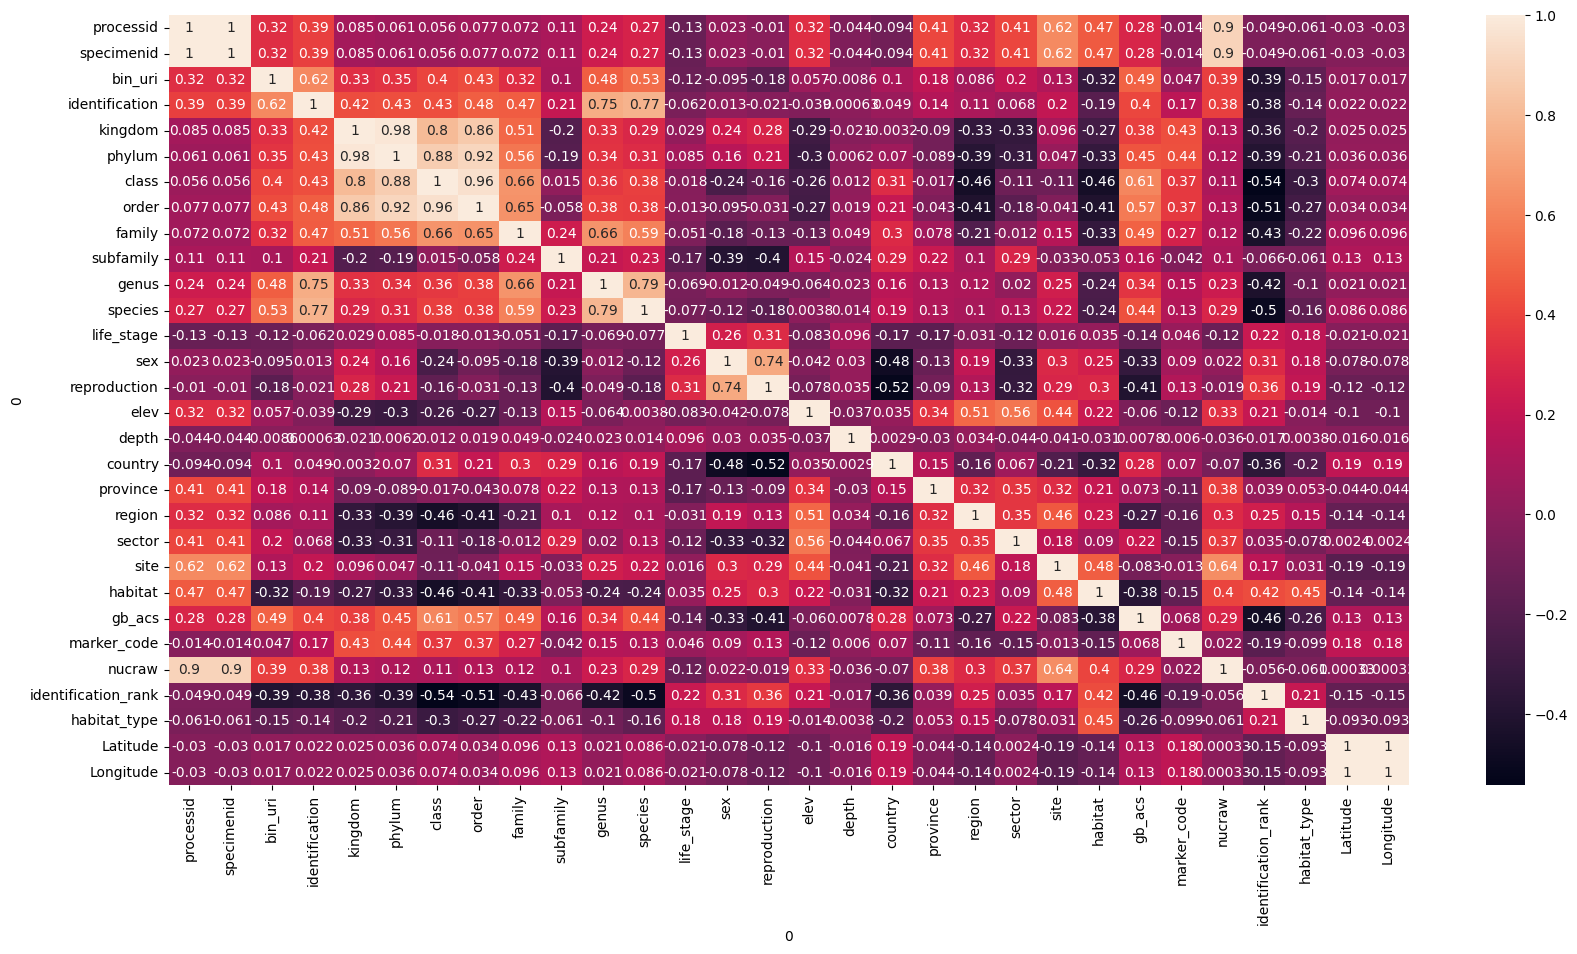

In [ ]:
#Correlation of encoded_df
fig = plt.figure(figsize=(20, 10))

sns.heatmap(encoded_df3.corr(), annot=True, cbar='coolwarm')

In [ ]:
#Selecting few of the columns that are of interest

encoded_df3selected=encoded_df3[["processid",'specimenid','bin_uri','identification','kingdom','phylum','species','Latitude','Longitude','elev','depth','habitat','marker_code','nucraw','identification_rank']].copy(deep=True)


<Axes: xlabel='0', ylabel='0'>

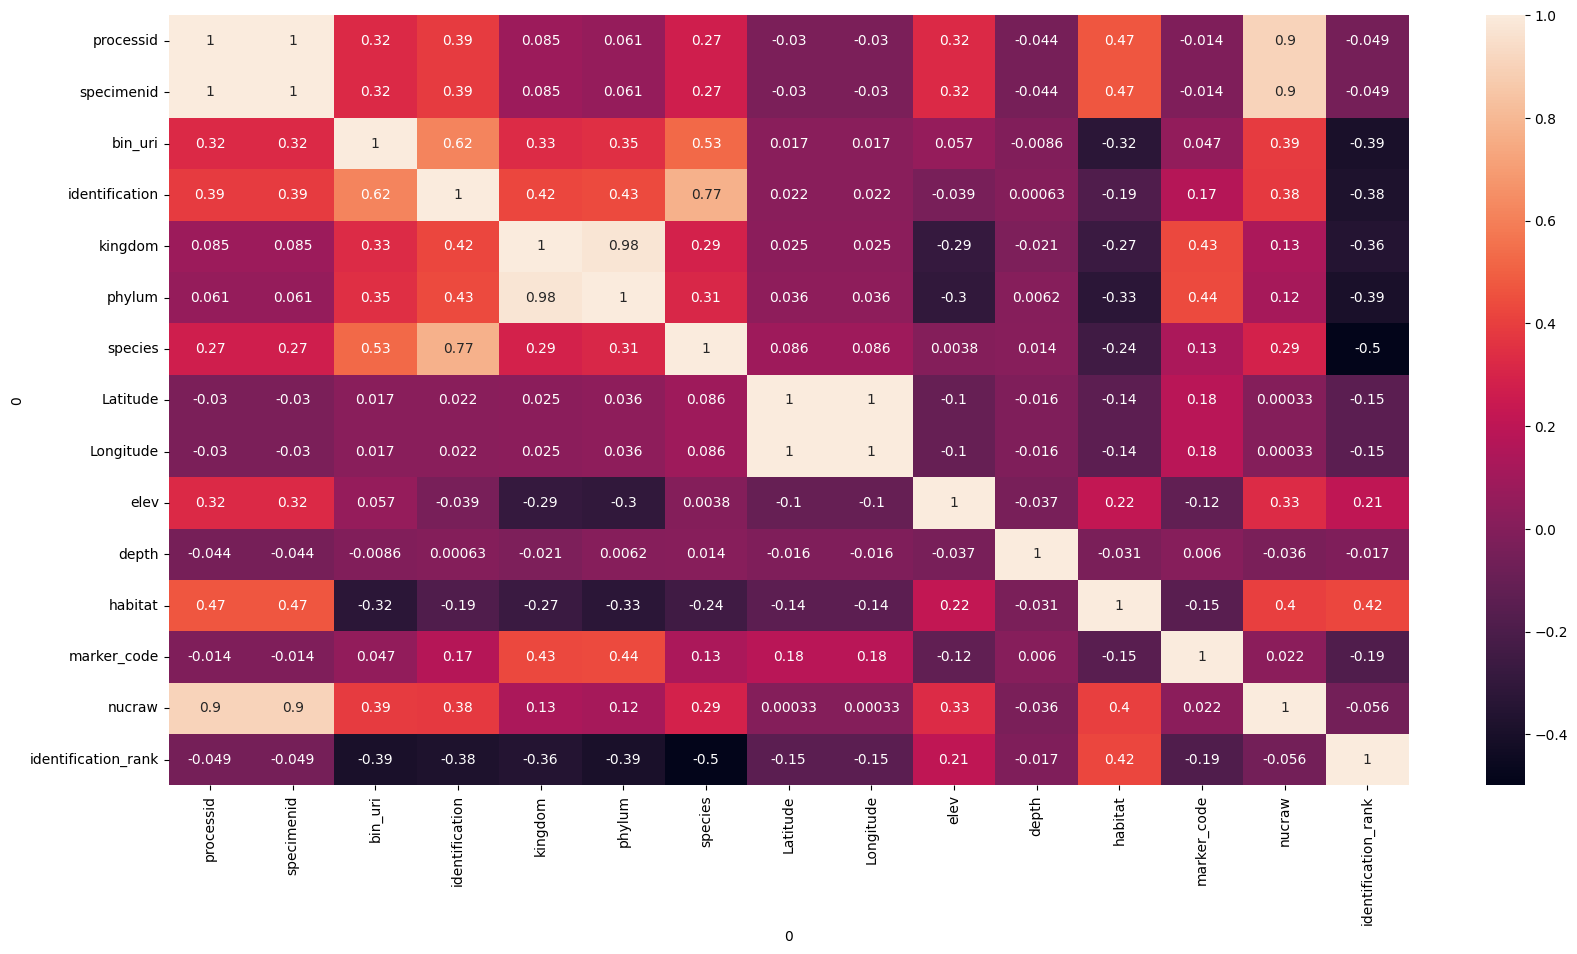

In [ ]:
#Checking correlation with selected df
fig = plt.figure(figsize=(20, 10))

sns.heatmap(encoded_df3selected.corr(), annot=True, cbar='coolwarm')

In [ ]:
#Feature set of encoded_df
encoded_df3_x=encoded_df3.drop(columns=['habitat'])

In [ ]:
#df_c=df3_encoded[['bin_uri','nucraw']]

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#NORMALIZING THE DATA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_df3_x)



In [ ]:
# Range of clusters to test
cluster_range = range(2, 20)  # Typically, 2 to 10 clusters are tested

from sklearn.metrics import silhouette_score
# Lists to store the results
inertia = []
silhouette_scores = []



# Run KMeans for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Plot the Silhouette Analysis results
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

# Find the optimal number of clusters based on silhouette scores
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on silhouette scores is: {optimal_clusters}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
kmeans19 = KMeans(n_clusters=19, random_state=42)
kmeans19.fit(encoded_df3_x)
encoded_df3_x['Cluster_19'] = kmeans19.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import joblib
# Save the model as a pickle in a file
joblib.dump(kmeans19, 'kmeans19model.pkl')

['kmeans19model.pkl']

In [ ]:
kmeans12 = KMeans(n_clusters=12, random_state=42)
kmeans12.fit(encoded_df3_x)
encoded_df3_x['Cluster_12'] = kmeans12.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
joblib.dump(kmeans12, 'kmeans12model.pkl')

['kmeans12model.pkl']

In [ ]:
#With cluster 19
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df3x['Cluster_19'], encoded_df3_x['nucraw'], c=encoded_df3_x['habitat_type'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('edna Samples')
plt.colorbar(label='Habitat_type')
plt.show()

In [ ]:
#With cluster 12
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df3_x['Cluster_12'], encoded_df3_x['nucraw'], c=encoded_df3_x['habitat_type'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('edna samples')
plt.colorbar(label='Habitat type')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_df3_x)
encoded_df3_x['PC1'] = principal_components[:, 0]
encoded_df3_x['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df3_x['PC1'], encoded_df3_x['PC2'], c=encoded_df3_x['Cluster_19'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_df3_x)
encoded_df3_x['PC1'] = principal_components[:, 0]
encoded_df3_x['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df3_x['PC1'], encoded_df3_x['PC2'], c=encoded_df3_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df3_x['species'], encoded_df3_x['habitat_type'], c=encoded_df3_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Species')
plt.ylabel('habitat_type')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df3_x['species'], encoded_df3_x['marker_code'], c=encoded_df3_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Species')
plt.ylabel('marker_code')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df3_x['habitat_type'], encoded_df3_x['species'], c=encoded_df3_x['Cluster_19'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Habitat Type')
plt.ylabel('Species')
plt.colorbar(label='Cluster')
plt.xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=90)
#plt.yticks(encoders_species['Encoded Value'],encoders_species['Original Value'])
plt.show()

In [ ]:
len(encoded_df3_x['species'].unique())

In [ ]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# Get unique values in 'column1'
unique_species = encoded_df3_x['species'].unique() #all values were crashing ram

encoded_df3_x_ = encoded_df3_x[encoded_df3_x['species']!=0]
# Create subplots
num_unique_values = 5#len(unique_values) #5
fig, axs = plt.subplots(num_unique_values, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=encoded_df3_x_['Cluster_12'].min(), vmax=encoded_df3_x_['Cluster_12'].max())

# If only one subplot, axs will not be a list, so we need to handle that case
if num_unique_values == 1:
    axs = [axs]
random_sample= pd.Series(unique_species).sample(5, random_state=1).tolist()
for i, value in enumerate(random_sample):#enumerate(unique_values):#
    subset_df = encoded_df3_x_[encoded_df3_x['species'] == value]
    axs[i].scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
    sub_t=encoders_species[encoders_species['Encoded Value']==value]['Original Value'].values[0]
    axs[i].set_title(f'Distribution of {sub_t}')
    axs[i].set_xlabel('Habitat Type')
    axs[i].set_xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=30)
    axs[i].set_ylabel('EDNA Sample')



# Add a common colorbar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Cluster')



plt.show()

In [ ]:
import matplotlib.animation as animation

# Create a figure and axis for the plot
fig, axs = plt.subplots(num_unique_values, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=encoded_df3_x_['Cluster_12'].min(), vmax=encoded_df3_x_['Cluster_12'].max())

# Function to update the plot for each frame in the animation
def update(frame):
    axs[0].clear()  # Clear the previous plot
    random_sample = pd.Series(unique_species).sample(5, random_state=frame).tolist()  # Randomly select 5 species
    for i, value in enumerate(random_sample):
        subset_df = encoded_df3_x_[encoded_df3_x_['species'] == value]
        axs[i].scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
        sub_t = encoders_species[encoders_species['Encoded Value'] == value]['Original Value'].values[0]
        axs[i].set_title(f'Distribution of {sub_t}')
        axs[i].set_xlabel('Habitat Type')
        axs[i].set_xticks(encoders_habitat['Encoded Value'], encoders_habitat['Original Value'], rotation=30)
        axs[i].set_ylabel('EDNA Sample')

    # Add a common colorbar
    cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
    cbar.set_label('Cluster')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=20, repeat=False)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize figure and axes
fig, axs = plt.subplots(1, 1, figsize=(8,  10))

# Initialize lines for each subplot

#l, = axs.scatter(encoded_df_x_['habitat_type'], encoded_df_x_['nucraw'])  # Initialize with some data


# Define update function
def update(frame):
    # Get unique values in 'column1'
    unique_species = encoded_df3_x['species'].unique() #all values were crashing ram
    encoded_df3_x_ = encoded_df3_x[encoded_df3_x['species']!=0]
    encoded_df3_x_ = encoded_df3_x_[encoded_df3_x_['habitat_type']!=0]
# Create subplots
    #num_unique_values = 5#len(unique_values) #5
    #fig, axs = plt.subplots(1, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
    cmap = plt.get_cmap('viridis')
    norm = Normalize(vmin=encoded_df3_x_['Cluster_12'].min(), vmax=encoded_df3_x_['Cluster_12'].max())

# If only one subplot, axs will not be a list, so we need to handle that case
    random_sample= pd.Series(unique_species).sample(1).tolist()
    subset_df = encoded_df3_x_[encoded_df_x_['species'] == random_sample[0]]
    axs.scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
    sub_t=encoders_species[encoders_species['Encoded Value']==value]['Original Value'].values[0]
    axs.set_title(f'Distribution of {sub_t}')
    axs.set_xlabel('Habitat Type')
    axs.set_xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=30)
    axs.set_ylabel('EDNA Sample')



# Add a common colorbar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Cluster')



# Create animation
ani = animation.FuncAnimation(fig, update, frames=50, repeat=False)

# Save animation as MP4
ani.save('animation3.mp4')

plt.show()


-----------------------------------------------------------------
Here we are starting with DNA alignment and Distance matrix generation.

In [ ]:
#installing biopython
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.1 MB/s eta 0:00:00


In [ ]:
'''
samp_seq1=df_2.loc[[1],['nucraw']].values
samp_acc=df_2.loc[[1],['gb_acs']].values
ref_seq='AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTGTTTATCCACCTCTTTCAAGAAATATTGCCCATAGAGGAGCTTCTGTTGATTTAGCAATTTTTTCCCTACATTTAGCCGGGATTTCATCTATTCTTGGAGCAGTAAATTTTATTACTACAGTTATTAATATACGATCTGCTGGAATTACATTAGATCGAATACCTTTATTTGTTTGATCTGTAATAATTACTGCGGTACTTCTATTATTATCATTACCTGTTTTAGCAGGTGCAATTACAATACTTCTAACTGATCGTAATCTAAATACTTCTTTTTTTGACCCTGCGGGAGGTGGGGATCCAATTTTATATCAACATTTATTT'
print(samp_acc)
'''

In [ ]:
'''
samp_seq1==ref_seq
'''

In [ ]:
from Bio import Entrez, SeqIO

##Fetching Reference sequence from ncbi using batch

# email address, which NCBI requires for access
Entrez.email = "medhasharma3250@gmail.com"


def fetch_sequences(accession_numbers):
    """
    Fetches nucleotide sequences from GenBank given a list of accession numbers.
    """
    try:
        # Post the list of accession numbers to NCBI
        search_results = Entrez.epost(db="nucleotide", id=",".join(accession_numbers))
        search_results_content = search_results.read().decode("utf-8")
        webenv = search_results_content.split("<WebEnv>")[1].split("</WebEnv>")[0]
        query_key = search_results_content.split("<QueryKey>")[1].split("</QueryKey>")[0]

        # Fetch the sequence data from NCBI
        handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", webenv=webenv, query_key=query_key)
        records = list(SeqIO.parse(handle, "genbank"))
        handle.close()

        return records
    except Exception as e:
        print(f"Error fetching data for accession numbers: {e}")
        return []


# Example GenBank accession numbers
accession_numbers = df_2['gb_acs'].unique().tolist() # Replace with valid accession numbers

# Fetch the sequences in batch
sequences = fetch_sequences(accession_numbers)

# Dictionary to store fetched sequences
sequences_dict = {record.id: record.seq for record in sequences}

# Display the fetched sequences
'''
for acc, record in sequences_dict.items():
    print(f"Accession: {acc}")
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq}\n")
'''


'\nfor acc, record in sequences_dict.items():\n    print(f"Accession: {acc}")\n    print(f"Description: {record.description}")\n    print(f"Sequence: {record.seq}\n")\n'

In [ ]:
len(sequences_dict)

1688

In [ ]:
# Function to clean up the sequence strings
def clean_sequence(seq):
    seq=str(seq)
    if seq.startswith('Seq(') and seq.endswith(')'):
        return seq[4:-1]
    return seq
def clean_keys(key):
    return key.split('.')[0]


In [ ]:
# Clean up the sequences in the dictionary
cleaned_sequence_dic = {clean_keys(k): clean_sequence(v) for k, v in sequences_dict.items()}

In [ ]:
len(cleaned_sequence_dic)

1688

In [ ]:
cleaned_sequence_dic['MN183996']

'AACTTTATACTTTATTTTTGGAGCTTGAGCAGGCATAGTGGGTACTTCATTAAGCCTTCTTATTCGAGCCGAACTTGGTCAACCAGGTAGACTTATTGGAAATGATCAAATTTATAATGTAATTGTTACAGCCCACGCATTTGTAATAATTTTCTTTATAGTAATACCTATTATAATTGGTGGATTTGGAAACTGACTTGTCCCTTTAATGTTAGGAGCTCCTGATATAGCATTCCCACGAATAAACAATATAAGATTTTGACTTCTACCACCTTCTTTAACTTTACTATTATCTAGAGGAATAGTAGAAAGAGGAGTTGGAACGGGGTGAACCGTTTACCCTCCCTTAGCCGGTGGAATTGCTCACGCCGGAGCATCAGTAGATATAGGAATTTTCTCTCTACATTTAGCAGGCGTTTCTTCAATTTTAGGTGCTGTAAATTTTATAACTACCGTTATCAACATACGAACTGCAGGAATAACTATAGATCAAATACCTTTATTTGTTTGAGCTGTATTCTTAACAGCTATTTTACTTTTATTATCTCTACCAGTTCTAGCTGGAGCTATTACTATACTTTTAACTGACCGAAACCTAAACACGTCATTCTTCGATCCCGCAGGAGGTGGTGACCCCGTTCTATATCAACACCTATTT'

In [ ]:
sequences_dict.keys()

In [ ]:
accession_numbers

In [ ]:
samp_seq1df=df_2[df_2['gb_acs']=='MK851247'].copy()
samp_seq1df[['processid','marker_code','species','gb_acs','habitat_type','nucraw']]

In [ ]:
accession_numbers = df_3['gb_acs'].unique().tolist()

In [ ]:
samp_seq2df=df_2[df_2['species']=='Lutzomyia cruciata']
samp_seq2df[['processid','marker_code','species','gb_acs','habitat_type','nucraw']]

In [ ]:
#Grouping
grouped_df=df_3.groupby(['species', 'processid', 'marker_code','gb_acs','nucraw','habitat_type'])
grouped_df.head()

0           processid specimenid       bin_uri         identification  \
1         AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata   
2         AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis   
3         AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis   
4         AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis   
5         AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis   
...               ...        ...           ...                    ...   
108546  ABWYT20392-24   20768574          None          Cecidomyiidae   
108547  ABWYT20393-24   20768575          None          Cecidomyiidae   
108548  ABWYT20394-24   20768576          None            Metopininae   
108549  ABWYT20395-24   20768577          None            Metopininae   
108550  ABWYT20396-24   20768578          None            Metopininae   

0        kingdom      phylum    class    order         family      subfamily  \
1       Animalia  Arthropoda  Insecta  Diptera    Psychodidae  Phlebotominae   
2       Animalia  Arthropoda  Insecta  Diptera    Psychodidae  Phlebotominae   
3       Animalia  Arthropoda  Insecta  Diptera    Psychodidae  Phlebotominae   
4       Animalia  Arthropoda  Insecta  Diptera    Psychodidae  Phlebotominae   
5       Animalia  Arthropoda  Insecta  Diptera    Psychodidae  Phlebotominae   
...          ...         ...      ...      ...            ...            ...   
108546  Animalia  Arthropoda  Insecta  Diptera  Cecidomyiidae           None   
108547  Animalia  Arthropoda  Insecta  Diptera  Cecidomyiidae           None   
108548  Animalia  Arthropoda  Insecta  Diptera       Phoridae    Metopininae   
108549  Animalia  Arthropoda  Insecta  Diptera       Phoridae    Metopininae   
108550  Animalia  Arthropoda  Insecta  Diptera       Phoridae    Metopininae   

0       ... sector                     site                         habitat  \
1       ...   None                     None                            None   
2       ...   None                     None                            None   
3       ...   None                     None                            None   
4       ...   None                     None                            None   
5       ...   None                     None                            None   
...     ...    ...                      ...                             ...   
108546  ...   None  Grey Mountain subalpine  1. Forest|1.2 Subarctic Forest   
108547  ...   None  Grey Mountain subalpine  1. Forest|1.2 Subarctic Forest   
108548  ...   None  Grey Mountain subalpine  1. Forest|1.2 Subarctic Forest   
108549  ...   None  Grey Mountain subalpine  1. Forest|1.2 Subarctic Forest   
108550  ...   None  Grey Mountain subalpine  1. Forest|1.2 Subarctic Forest   

0         gb_acs marker_code  \
1       MK851247      COI-5P   
2       MK851267      COI-5P   
3       MK851266      COI-5P   
4       MK851265      COI-5P   
5       MK851254      COI-5P   
...          ...         ...   
108546      None      COI-5P   
108547      None      COI-5P   
108548      None      COI-5P   
108549      None      COI-5P   
108550      None      COI-5P   

0                                                  nucraw identification_rank  \
1       AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species   
2       GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
3       GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
4       GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
5       GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
...                                                   ...                 ...   
108546  CACATTATATTTTATTTTTGGAATTTGAGCAGGAATATTAGGAACA...              family   
108547  TACTTTATATTTTATTTTTGGCATTTGAGCTGGAATAATTGGAACA...              family   
108548  AACATTATATTTTATTTTTGGGGCCTGAGCTGGAATAATTGGTACT...           subfamily   
108549  AACATTATAT

In [ ]:
selgrouped_df3=grouped_df[['species', 'processid', 'marker_code','gb_acs','nucraw','habitat_type']].head()

In [ ]:
selgrouped_df3.shape

(108550, 6)

In [ ]:

selgrouped_df3['ref_nu']=selgrouped_df3['gb_acs'].map(cleaned_sequence_dic)

In [ ]:
selgrouped_df3.head()

0                species    processid marker_code    gb_acs  \
1     Lutzomyia cruciata  AAASF001-17      COI-5P  MK851247   
2  Lutzomyia longipalpis  AAASF004-17      COI-5P  MK851267   
3  Lutzomyia longipalpis  AAASF005-17      COI-5P  MK851266   
4  Lutzomyia longipalpis  AAASF006-17      COI-5P  MK851265   
5  Lutzomyia longipalpis  AAASF007-17      COI-5P  MK851254   

0                                             nucraw habitat_type  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...         None   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   

0                                             ref_nu  
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...  
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...  
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...  
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...  
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...

In [ ]:
!sudo apt-get update
!sudo apt-get install libenchant1c2a libenchant-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [917 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,885 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archiv

In [ ]:
!pip install python-Levenshtein


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.1 MB/s eta 0:00:00


In [ ]:
from Levenshtein import distance

def calculate_distance(row):
    nucraw = str(row['nucraw'])
    reference_seq = str(row['ref_nu'])
    return distance(nucraw, reference_seq)



In [ ]:
# Apply the function to each row and store the distances in a new column
selgrouped_df3['levenshtein_distance'] = selgrouped_df3.apply(calculate_distance, axis=1)


In [ ]:
selgrouped_df3.head()

0                species    processid marker_code    gb_acs  \
1     Lutzomyia cruciata  AAASF001-17      COI-5P  MK851247   
2  Lutzomyia longipalpis  AAASF004-17      COI-5P  MK851267   
3  Lutzomyia longipalpis  AAASF005-17      COI-5P  MK851266   
4  Lutzomyia longipalpis  AAASF006-17      COI-5P  MK851265   
5  Lutzomyia longipalpis  AAASF007-17      COI-5P  MK851254   

0                                             nucraw habitat_type  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...         None   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   

0                                             ref_nu  levenshtein_distance  
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...                     0  
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0  
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0  
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0  
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0

In [ ]:
selgrouped_df3.to_csv('final_grouped.csv',sep=',', index=False, encoding='utf-8')

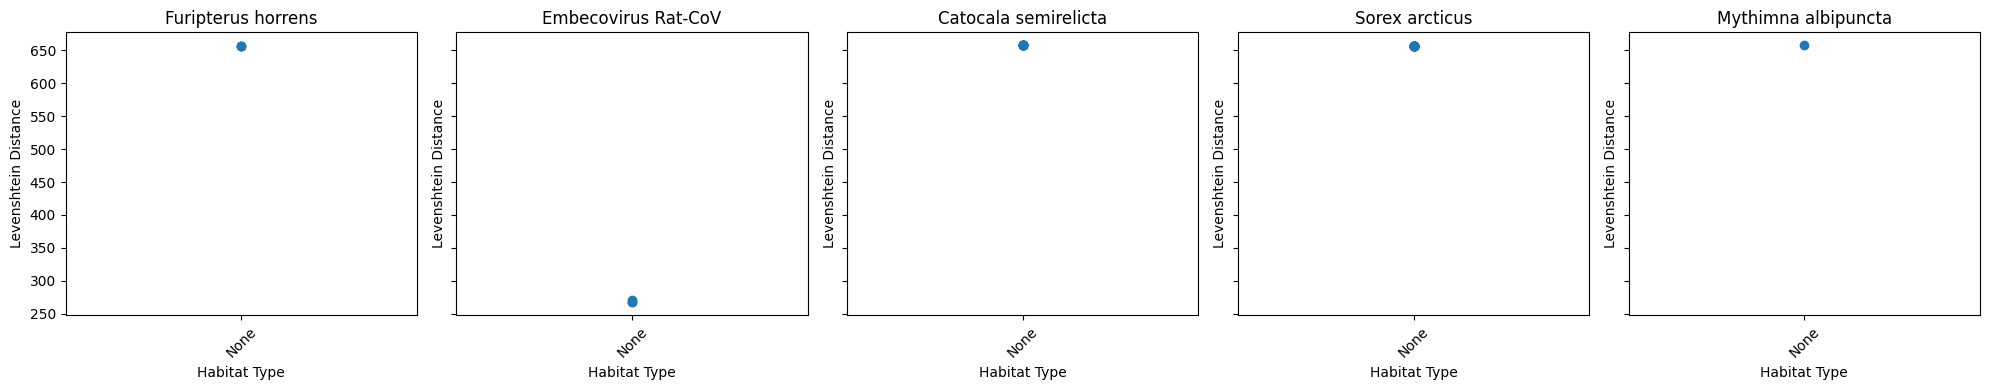

In [ ]:
# Specify the species value you want to plot

# Select five random species
random_species = selgrouped_df3['species'].unique()

selected_species = np.random.choice(random_species, size=5, replace=False)

# Create scatter plots for each selected species
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i,species in enumerate(selected_species):
    selected_df = selgrouped_df3[selgrouped_df3['species'] == species]
    axs[i].scatter(selected_df['habitat_type'], selected_df['levenshtein_distance'], label=species)
    axs[i].set_title(f"{species}")
    axs[i].set_xlabel("Habitat Type")
    axs[i].set_ylabel("Levenshtein Distance")
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
selgrouped_df3.info()

In [ ]:
selgrouped_df3_obj=selgrouped_df3[['species', 'processid', 'marker_code','gb_acs','nucraw','habitat_type']]

In [ ]:
selencodedgrouped=selgrouped_df3

In [ ]:
#Encoding
encoded_selgrouped_df3, encoders_sel_df3 = manual_encode(selgrouped_df3)


In [ ]:
selgrouped_df3.head()

0                species    processid marker_code    gb_acs  \
1     Lutzomyia cruciata  AAASF001-17      COI-5P  MK851247   
2  Lutzomyia longipalpis  AAASF004-17      COI-5P  MK851267   
3  Lutzomyia longipalpis  AAASF005-17      COI-5P  MK851266   
4  Lutzomyia longipalpis  AAASF006-17      COI-5P  MK851265   
5  Lutzomyia longipalpis  AAASF007-17      COI-5P  MK851254   

0                                             nucraw habitat_type  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...         None   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...         None   

0                                             ref_nu  levenshtein_distance  
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...                     0  
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0  
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0  
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0  
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...                     0

In [ ]:
encoded_selgrouped_df3.head()

0  species  processid  marker_code  gb_acs  nucraw  habitat_type  ref_nu  \
1        0          0            0       0       0             0       0   
2        1          1            0       1       1             0       1   
3        1          2            0       2       2             0       2   
4        1          3            0       3       3             0       3   
5        1          4            0       4       4             0       4   

0  levenshtein_distance  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0

In [ ]:
# Assuming 'encoders' is the dictionary from the manual_encode function
# Create a list to hold the rows for the new DataFrame
encodersel_df3_list = []

# Loop through the encoders dictionary to create rows
for column, mapping in encoders_sel_df3.items():
    for original_value, encoded_value in mapping.items():
        encodersel_df3_list.append({'Column': column, 'Original Value': original_value, 'Encoded Value': encoded_value})

# Create a DataFrame from the list
encoders_sel_df_3 = pd.DataFrame(encodersel_df3_list)

# Visualize the DataFrame
print(encoders_sel_df_3.head())  # Display the first few rows of the DataFrame

# Optionally, save the DataFrame to a CSV file for easier inspection
encoders_sel_df_3.to_csv('encoders_sel_mapping.csv', index=False)

    Column         Original Value  Encoded Value
0  species     Lutzomyia cruciata              0
1  species  Lutzomyia longipalpis              1
2  species     Dampfomyia deleoni              2
3  species      Brumptomyia mesai              3
4  species    Dampfomyia beltrani              4


In [ ]:
encoded_X=encoded_selgrouped_df3[['species',	'processid',	'marker_code',	'gb_acs',	'nucraw'	,	'levenshtein_distance']]
encoded_y=encoded_selgrouped_df3[['habitat_type']]

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, encoded_y, test_size=0.3, random_state=42)


In [ ]:
#Classification Modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
import joblib
joblib.dump(model, 'DTHabitatClassifier.pickle')


####XXXXXXXXXXXXXXXXXX###############
#XXXXXXXXXXXXXX##################XXXX

['DTHabitatClassifier.pickle']

In [ ]:
prediction = model.predict('Cyanocorax yucatanicus', 'ABWYT20396-24', 'FL-COI', 'HM208656',
                           'TTATATTTTATATTTGGAGCTTGAGCAGGTATAGTAGGAACCTCTTTAAGAATCTTAATTCGAGCAGAACTAGGACACCCAGGAGCTCTAATTGGAGATGACCAAATTTATAATATAATTGTAACAGCCCATGCTTTTATTATAATTTTTTTTATAGTTATACCTGTTATAATTGGAGGATTTGGAAATTGACTAGTACCCCTAATACTAGGAGCCCCAGATATAGCCTTTCCTCGAATAAATAATATAAGTTTTTGACTTCTTCCTCCTGCTTTAACCTTATTGCTAATAAGCAGTATAGTAGAAAACGGAGCTGGGACAGGATGAACAGTTTACCCTCCTCTCTCTTCAGTTATTGCTCATAGAGGAGCTTCAGTTGATCTTGCAATTTTTTCATTACATTTAGCTGGTATTTCATCTATTTTAGGAGCAGTAAATTTTATTACAACTATTATTAATATGCGATCTGCAGGAATTTCTTTTGATCGAATACCTTTATTTGTTTGATCTGTATTAATCACAGCAGTATTACTTCTTTTATCTCTTCCTGTTCTTGCAGGAGCTATTACTATATTATTAACAGATCGAAATTTTAATACTTCATTCTTTGATCCTGCTGGAGGTGGAGACCCTATTTTATACCAACACTTATTT', 450 )

prediction

TypeError: BaseDecisionTree.predict() takes from 2 to 3 positional arguments but 7 were given

In [ ]:
import pickle

with open("Classifier.pickle", "wb") as f:
  model_pick = pickle.dump(model, f)

In [ ]:
targets_class=encoders_sel_df_3[encoders_sel_df_3['Column']=='habitat_type']

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


class_names = {idx: value for value, idx in zip(targets_class['Original Value'],targets_class['Encoded Value'])}
report = classification_report(y_test, y_pred, target_names=[class_names[i] for i in range(len(class_names))])

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9830185782281591
Classification Report:
               precision    recall  f1-score   support

         None       0.99      0.99      0.99     21174
       Forest       0.97      0.98      0.98      8218
    Grassland       0.97      0.95      0.96      1532
       Marine       1.00      1.00      1.00       668
Mixed Habitat       0.93      0.69      0.79        39
      Unknown       0.97      0.92      0.95        39
      Wetland       0.67      0.67      0.67         3
   Water Body       0.57      0.57      0.57         7
 River/Stream       0.77      1.00      0.87        23
        Other       0.95      0.91      0.93        22
         Cave       0.00      0.00      0.00         2
    Shrubland       0.93      0.92      0.93       838

     accuracy                           0.98     32565
    macro avg       0.81      0.80      0.80     32565
 weighted avg       0.98      0.98      0.98     32565



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('species:', selgrouped_df3.loc[108546,'species'])
print('processid:', selgrouped_df3.loc[108546,'processid'])
print('marker_code:', selgrouped_df3.loc[108546,'marker_code'])
print('gb_acs:', selgrouped_df3.loc[108546,'gb_acs'])
print('nucraw:', selgrouped_df3.loc[108546,'nucraw'])
print('habitat_type:', selgrouped_df3.loc[108546,'habitat_type'])



species: None
processid: ABWYT20392-24
marker_code: COI-5P
gb_acs: None
nucraw: CACATTATATTTTATTTTTGGAATTTGAGCAGGAATATTAGGAACATCATTAAGGTTATTAATTCGAATAGAATTAAGAACTCTTAGGAATATAATTAGAAATGATCAAATTTATAATGTTATTGTAACAGCTCATGCTTTTATTATAATTTTTTTTATAGTTATACCTATTTTAATTGGAGGATTTGGAAATTGATTAATTCCTATTATATTAAATGCTCCAGATATAGCATTTCCACGAATAAATAATATAAGATTTTGAATATTACCTCCTTCTTTATCATTATTATTAATTAGAAGACTAGTAGAAACAGGTACAGGAACAGGATGAACAGTTTATCCCCCTTTATCTTCTGTAATTGCCCATACAGGATCTTCAGTAGATTTTTCTATTTTTTCTCTACATATTGCAGGAATTTCTTCTATTCTTGGAGCTATTAATTTTATTTCTACAATAATTAATATAAAAATTAAATTTTTAAAATTTAGTCAAATTTCTTTATTTACTTGATCAATTTTAATTACAACTATTTTATTACTTCTATCATTACCAGTATTAGCTGGAGCTATTACTATATTATTGACAGATCGAAATTTAAATACATCATTTTTTGATCCTATAGGAGGTGGAGATCCAATTCTTTATCAACATTTATTT
habitat_type: Forest


In [ ]:
# Filter out rows where any column contains the string 'None'
filtered_df = selgrouped_df3[~selgrouped_df3.apply(lambda row: row.astype(str).str.contains('None').any(), axis=1)]

# Select the first 10 rows
result_df = filtered_df.sample(10)
result_df = result_df.reset_index(drop=True)
result_df.to_csv('Testset.csv', index=False)

In [ ]:
result_df

0                 species     processid marker_code    gb_acs  \
0         Tamias striatus    ABMC249-05      COI-5P  JF457162   
1     Echinometra viridis   ABBAI973-16         16S  MN701247   
2  Mystacides interjectus   ABCAD006-08      COI-5P  KM537634   
3        Brissus unicolor  ABBAI1068-16         16S  MN701212   
4   Hydroptila XZ sp. AB1   ABCAD226-08      COI-5P  KM528901   
5  Limnephilus sublunatus   ABCAD020-08      COI-5P  KM534012   
6  Limnephilus sublunatus   ABCAD171-08      COI-5P  KM534567   
7    Oreaster reticulatus   ABBAI460-15         16S  MN730834   
8     Anabolia bimaculata   ABCAD153-08      COI-5P  KM532511   
9     Mithrodia clavigera   ABBAI612-16      COI-5P  MN730668   

0                                             nucraw   habitat_type  \
0  NNNNNNNNNNTCCTATTTGGTGCTTGAGCAGGAATGGTTGGCACAG...         Forest   
1  CGCTCCCTGAACCTAAAAACATAGGGAGTCCTGCCTGCCCAGTGAC...         Marine   
2  AACTTTATATTTTATTTTCGGTATTTGATCAGGCCTACTAGGAACT...  Mixed Habitat   
3  CGCCCTTTGAAAGAATAAGCATAAAGGGTCCTGCCTGCCCAGTGAC...         Marine   
4  AATATTATATTTTATTTTAGGGACTTGATCAGGAATAATTGGTACC...        Unknown   
5  AACTATTTATTTTATTTTTGGTATCTGAGCAGGAATAGTTGGAACT...  Mixed Habitat   
6  AACTATTTATTTTATTTTTGGTATCTGAGCAGGAATAGTTGGAACT...        Unknown   
7  CGCCCTCTGTAAAGTTTTATCTTATATATGGGGGGTCCTGCCTGCC...         Marine   
8  AACTATTTATTTTATCTTTGGAATTTGAGCAGGAATAATTGGAACT...      Grassland   
9  ACATTGGTACTCTCTATCTAATATTTGGAGCTTGAGCAGGGATGGT...         Marine   

0                                             ref_nu  levenshtein_distance  
0                                                NaN                   657  
1                                                NaN                   571  
2                                                NaN                   658  
3  CGCCCTTTGAAAGAATAAGCATAAAGGGTCCTGCCTGCCCAGTGAC...                     0  
4                                                NaN                   658  
5                                                NaN                   658  
6                                                NaN                   658  
7                                                NaN                   589  
8                                                NaN                   658  
9                                                NaN                   654

In [ ]:
#User Input Values Example 1
species1='Lutzomyia cruciata'
processid1='AAASF001-17'
marker_code1='COI-5P'
gb_acs1='MK851247'
nucraw1='AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTGTTTATCCACCTCTTTCAAGAAATATTGCCCATAGAGGAGCTTCTGTTGATTTAGCAATTTTTTCCCTACATTTAGCCGGGATTTCATCTATTCTTGGAGCAGTAAATTTTATTACTACAGTTATTAATATACGATCTGCTGGAATTACATTAGATCGAATACCTTTATTTGTTTGATCTGTAATAATTACTGCGGTACTTCTATTATTATCATTACCTGTTTTAGCAGGTGCAATTACAATACTTCTAACTGATCGTAATCTAAATACTTCTTTTTTTGACCCTGCGGGAGGTGGGGATCCAATTTTATATCAACATTTATTT'


In [ ]:
#User Input Values Example 2
species1= result_df.loc[1,'species']
processid1=result_df.loc[1,'processid']
marker_code1=result_df.loc[1,'marker_code']
gb_acs1=result_df.loc[1,'gb_acs']
nucraw1=result_df.loc[1,'nucraw']


In [ ]:

# User-defined values
user_values = {
    'species': str(species1),
    'processid': str(processid1),
    'marker_code': str(marker_code1),
    'gb_acs': str(gb_acs1),
    'nucraw': str(nucraw1)
}


#import pandas as pd


# Example GenBank accession numbers
accession_numbers = list(set(list(gb_acs1)))

# Fetch the sequences in batch
sequences_ = fetch_sequences(accession_numbers)

# Dictionary to store fetched sequences
sequences_dict_ = {record.id: record.seq for record in sequences_}
#Clean sequences
cleaned_sequence_dic_ = {clean_keys(k): clean_sequence(v) for k, v in sequences_dict_.items()}

#Convert User values to df
user_df=pd.DataFrame([user_values])

#Add Reference DNA sequence column
user_df['ref_nu']=user_df['gb_acs'].map(cleaned_sequence_dic_)


#Calculate Levenshtein Distance

user_df['levenshtein_distance'] = user_df.apply(calculate_distance, axis=1)

##Encoding values
# Load the CSV file into a DataFrame
encoding_df3 = pd.read_csv('/content/encoders_sel_mapping.csv')

# Create mapping dictionaries for each column
mappings = {}
for column in encoding_df3['Column'].unique():
    column_mappings = encoding_df3[encoding_df3['Column'] == column].set_index('Original Value')['Encoded Value'].to_dict()
    mappings[column] = column_mappings


# Encode the object type columns in user_df
for col in user_df.select_dtypes(include=['object']).columns:
    if col in mappings:
        user_df[col] = user_df[col].map(mappings[col])

#Drop Ref_nu column
user_df=user_df.drop('ref_nu', axis='columns')
# Display the encoded DataFrame with the Levenshtein distance intact
print(user_df)

   species  processid  marker_code  gb_acs  nucraw  levenshtein_distance
0      403       8847            2    3641    6904                   571


In [ ]:
user_df

species  processid  marker_code  gb_acs  nucraw  levenshtein_distance
0      403       8847            2    3641    6904                   571

In [ ]:
# Make the prediction
predicted_encoded_class = model.predict(user_df)

# Assuming the target encoding mapping is available in 'encoded_df3'
# Reverse the mapping to get the original class
target_column = 'habitat_type'  # Replace with the actual target column name
reverse_mapping = {v: k for k, v in mappings[target_column].items()}


In [ ]:
predicted_class = reverse_mapping[predicted_encoded_class[0]]

In [ ]:
predicted_class

'Marine'

In [ ]:
#print(mappings['habitat_type'])

{nan: 0, 'Forest': 1, 'Grassland': 2, 'Marine': 3, 'Mixed Habitat': 4, 'Unknown': 5, 'Wetland': 6, 'Water Body': 7, 'River/Stream': 8, 'Other': 9, 'Cave': 10, 'Shrubland': 11}


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(selgrouped_df['habitat_type'], selgrouped_df['levenshtein_distance'], c=selgrouped_df['species'])
plt.title("Levenshtein Distance vs Habitat Type")
plt.xlabel("Habitat Type")
plt.ylabel("Levenshtein Distance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#Encoding selgrouped_df


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['bin_uri'], df_c['species'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('bin_uri')
plt.ylabel('species')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['nucraw'], df_c['kingdom'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('edna')
plt.ylabel('kingdom')
plt.colorbar(label='Cluster')
plt.show()

Extra_experiments---

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['nucraw'], df_c['phylum'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('edna')
plt.ylabel('phylum')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
value=0
x=encoders_species[encoders_species['Encoded Value']==value]['Original Value']
x.values[0]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_c)
kmeans = KMeans(n_clusters=76, random_state=42)
kmeans.fit(scaled_features)
df_c['Cluster'] = kmeans.labels_
print(df_c)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_c['PC1'] = principal_components[:, 0]
df_c['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(df_c['PC1'], df_c['PC2'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df2=pd.DataFrame({"AB": ["(19.3786,-88.1892)","(19.5855,-88.5843)","(19.5855,-88.5843)","(19.5855,-88.5843)","(19.5855,-88.5843)"]})
df2['AB'] = df2['AB'].str.strip('()')
df2[['Latitude', 'Longitude']] = df2['AB'].str.split(',', expand=True)
df2['Latitude'] = df2['Latitude'].astype(float)
df2['Longitude'] = df2['Longitude'].astype(float)
df2.drop(columns=['AB'], inplace=True)
df2.head()

In [ ]:

# Sample DataFrame
df2 = pd.DataFrame({"coord": ["none", "(19.3786,-88.1892)", "none", "(19.5855,-88.5843)", "none"]})

# Remove parentheses and split the column into two new columns, handling 'none' case
df2['coord'] = df2['coord'].str.strip('()')

# Create Latitude and Longitude columns initialized with None
df2[['Latitude', 'Longitude']] = None

# Update Latitude and Longitude for non-'none' values
mask = df2['coord'] != 'none'
df2.loc[mask, ['Latitude', 'Longitude']] = df2.loc[mask, 'coord'].str.split(',', expand=True)

# If coord is 'none', Latitude and Longitude should be 'None'
df2.loc[df2['coord'] == 'none', ['Latitude', 'Longitude']] = 'None'

print(df2)


In [ ]:
habitat=df3['habitat'].unique().copy()

In [ ]:
len(habitat)

In [ ]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
df2_encoded=df2.copy()
# Loop through each column and apply LabelEncoder if the column is of object type (categorical)
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2_encoded[column] = label_encoder.fit_transform(df2[column])

print("DataFrame before label encoding:")
print(df2)

print("DataFrame after label encoding:")
print(df2_encoded)